<img src="../images/cads-logo.png" style="height: 100px;" align=left> 
<img src="../images/jds.png" style="height: 100px;" align=right> 

# JDS Capstone: Target Market Analysis

You have been provided with information about the customers' historical purchase as the amount of money spent, Number of inactive months and so on. Two columns `Potential_Customer` and `Cust_Last_Purchase` represent the customers' respond to the latest advertisement. The column `Potential_Customer` represents if the customer purchased any product, and the column `Cust_Last_Purchase` represents the amount of this purchase and it is `Nan` if there has been no purchase.

## Data description
- Below is the description of each feature available in the dataset.
<img src="../images/MicrosoftTeams-image.png" style="height: 700px">

## Objective
**1. Design a predictive model to determine the potential customers who will purchase if you send the advertisement .** The target variable is `Potential_Customer`. 

    **Attention:** Because the column `Cust_Last_Purchase` relates to the target variable `Potential_Customer`, you need to exclude it from your model.

**2. Calculate the value and the revenue of your model.** Fit your model on train set. Assume amonge the customers on your test set we only send advertisement to those your model predicted as Class1 and we ignore the rest. From the data you can calculate the average `Cust_Last_Purchase` for those who are in the train set and had the last purchase (`Cust_Last_Purchase`>0) . Assume sending advertisement to each customer costs 5$ and the average purchase you calculated on the train set remains the same for the test set. Calculate the value of your models to choose the best model.

    - cost = advertisement_cost * number of the predicted positive
    - lost = average_purchase * number of the predicted negative but they have been positive
    - gain = average_purchase * number of the predicted positive and they have been positive
    - value = gain - lost - cost
    - revenue = gain - cost

**3. Compare your best model's revenue with the revenue of the default solution which is sending advertisement to all the customers in X_test.** Which solution would you choose?

    - cost = advertisement_cost * size of the test set
    - gain = sum(Cust_Last_Purchase) on test set
    - revenue = gain - cost
    
**4. Assume the next time you want to target a group of 30,000 customers simillar to this group. And assume the purchase rate is $10%$ which means 10 out of 100 people who receive the advertisement will purchase the product. Also assume your model will have the same Precision and Recall for Class1 .** Will you send the advertisement to everyone, or you use one of the models you have already created?

    - calculate your model's revenue on this set of 30,000 customers based on the above assumptions
    - calculate the revenue of the default model: send advertisement to everyone
         - cost = advertisement_cost * size of the test set
         - gain = average_purchase * purchase_rate
         - revenue = gain - cost
    
**Hint:**
    To calculate the revenue of a model for this new set of customers with different purchase rate we need to calculate the new confusion matrix given Precision and Recall for Class1 are fixed.

## Submission Guideline

Perform the following:

1. Create a team (2-3 people)
2. Perform the following:
    1. **Data Wrangling - Cleaning & Merging**: Check and handle the existance of missing values, the type of variables, or integrity of data
    2. **Exploratory Data Analysis**: Analyze data to summarize their main characteristics
    3. **Feature Engineering**: Make new features or change the current features
    4. **Feature Selection**: Choose the best features
    5. **Data Pre-Processing**: Make data usable for applying ML algorithms. 
    6. **Model Design**: Create several predictive models and tune the hyperparameters
    7. **Model Evaluation**: Compare the performance of the models
    8. **Bonus**: Any creative idea for improving machine learning models

The output expected at the end of this capstone is:
1. One **Jupyter notebook** containing all analysis performed using Python.
2. One **PowerPoint** presentation containing the analysis results. Each group will be allocated 15-20 minutes (inclusive of Q&A) to present their analysis results to the class. 

**One zip file per group** is to be uploaded on **GDrive** by the **time** that will be given to you by the trainer, including the **jupyter notebook(s)** and the **powerpoint presentation** indicating the **names of all group members**.

## Presentation Guideline

**Note(s):**
1. Only **one submission** is required per group.
2. Include full details in your notebook and **report only important results** in your presentation.
3. Please only use Jupyter notebook (pandas) to clean the data (Do not clean manually using Excel)

# Table of Content

- [JDS Capstone: Target Market Analysis](#JDS-Capstone:-Target-Market-Analysis)
- [Data description](#Data-description)
- [Objective](#Objective)
- [Submission Guideline](#Submission-Guideline)
- [Presentation Guideline](#Presentation-Guideline)
- [Table of Content](#Table-of-Content)
- [0. Import necessary Packages](#0.-Import-necessary-Packages)
- [1. Load the Data into Pandas Dataframe](#1.-Load-the-Data-into-Pandas-Dataframe)
- [2. Data Cleaning](#2.-Data-Cleaning)
    - [2.1 How big is the dataset? (number of rows, features and total datapoints)](#2.1-How-big-is-the-dataset?-(number-of-rows,-features-and-total-datapoints))
    - [2.2 What is the type of each column?](#2.2-What-is-the-type-of-each-column?)
        - [2.2.1 Why columns such as `Cust_Last_Purchase` are `object` while they should be `float64`? Fix the type of the columns as it should be.](#2.2.1-Why-columns-such-as-`Cust_Last_Purchase`-are-`object`-while-they-should-be-`float64`?-Fix-the-type-of-the-columns-as-it-should-be.)
    - [2.3 Check data for duplicate rows and remove the duplicates](#2.3-Check-data-for-duplicate-rows-and-remove-the-duplicates)
    - [2.4 Do we need `C_ID` in our analysis? Drop the columns you will not use in your analysis, if there is any.](#2.4-Do-we-need-`C_ID`-in-our-analysis?-Drop-the-columns-you-will-not-use-in-your-analysis,-if-there-is-any.)
- [3. Exploratory Data Analysis (EDA)](#3.-Exploratory-Data-Analysis-(EDA))
    - [3.1 Explore Categorical Variables](#3.2-Explore-Categorical-Variables)
        - [3.1.1 Insight](#3.1.1-Insight)
        - [3.1.2 Solution](#3.1.2-Solution)
    - [3.2 Explore Relationship Between Categorical & Target Variable. Interpret the observation](#3.2-Explore-Relationship-Between-Categorical-&-Target-Variable.-Interpret-the-observation)
        - [3.2.1. Insight](#3.2.1.-Insight)
    - [3.3 Explore Numerical Variables](#3.3-Explore-Numerical-Variables)
        - [3.3.1 Insight](#3.3.1-Insight)
    - [3.4 Explore the Relationship between Numerical Variables & Target Variable. Interpret your observation](#3.4-Explore-the-Relationship-between-Numerical-Variables-&-Target-Variable.-Interpret-your-observation)
    - [3.5 Explore the Relationship between the columns and try to answer the following questions:](#3.5-Explore-the-Relationship-between-the-columns-and-try-to-answer-the-following-questions:)
- [4. Feature Enginearing](#4.-Feature-Enginearing)
    - [4.1 Add Some High Level Features and explore their relationship with the target variable](#4.1-Add-Some-High-Level-Features-and-explore-their-relationship-with-the-target-variable)
    - [4.2 Check Correlation between Numerical Variables](#4.2-Check-Correlation-between-Numerical-Variables)
- [5. Feature Selection](#5.-Feature-Selection)
- [6. Data PreProcessing](#6.-Data-PreProcessing)
    - [6.1 Check the Data for Missing Values](#6.1-Check-the-Data-for-Missing-Values)
    - [6.2 Separate X (features) and y (target)](#6.2-Separate-X-(features)-and-y-(target))
    - [6.3 Split data to train/test](#6.3-Split-data-to-train/test)
    - [6.4 Dummy Variables](#6.4-Dummy-Variables)
    - [6.5 Feature Scaling](#6.5-Feature-Scaling)
    - [6.6 PCA on Numerical Columns only](#6.6-PCA-on-Numerical-Columns-only)
- [7. Objective 1: Machine Learning](#7.-Objective-1:-Machine-Learning)
- [8. Objective 2](#8.-Objective-2)
- [9. Objective 3](#9.-Objective-3)
- [10. Objective 4](#10.-Objective-4)

#   0. Import necessary Packages

In [14]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import SCORERS, roc_auc_score, f1_score
import warnings
warnings.filterwarnings("ignore")

#  1. Load the Data into Pandas Dataframe

In [23]:
# Load the data into data dataframe
data = pd.read_csv('../data.csv')

In [24]:
data.head()

Potential_Customer    C_ID Cust_Last_Purchase  Pur_3_years  Pur_5_years  \
0                   1    9946             $5.00             2           17   
1                   1   87939            $30.00             1            7   
2                   0   88003                NaN            5           12   
3                   1  188721            $20.00             1           11   
4                   1   88056             $5.00             3           15   

   Pur_3_years_Indirect  Pur_5_years_Indirect Pur_latest Pur_3_years_Avg  \
0                     2                     4     $0.00           $7.50    
1                     0                     3    $25.00          $25.00    
2                     3                     5    $15.00          $15.00    
3                     0                     3    $20.00          $20.00    
4                     2                     7     $3.00           $4.33    

  Pur_5_years_Avg  ... Ad_Res_5_Year  Ad_Res_Ind_1_Year  Ad_Res_Ind_3_Year  \
0          $7.76   ...            73                  3                 12   
1         $13.00   ...            55                  6                  6   
2         $11.25   ...            53                  6                 17   
3         $12.45   ...            71                  8                  8   
4          $3.80   ...            63                  6                 12   

   Ad_Res_Ind_5_Year  Status_Cust  Status_Latest_Ad   Age  Gender  Cust_Prop  \
0                 16            A                 0  71.0       F          H   
1                 22            A                 1   7.0       M          U   
2                 22            S                 1  79.0       F          U   
3                 33            A                 0  73.0       F          U   
4                 24            S                 1  68.0       F          H   

  Cust_Ann_Income  
0     $65,957.00   
1          $0.00   
2          $0.00   
3     $76,293.00   
4    $113,663.00   

[5 rows x 25 columns]

In [25]:
# View first 5 rows of dataframe
data.head().T

0        1        2            3  \
Potential_Customer                  1        1        0            1   
C_ID                             9946    87939    88003       188721   
Cust_Last_Purchase             $5.00   $30.00       NaN      $20.00    
Pur_3_years                         2        1        5            1   
Pur_5_years                        17        7       12           11   
Pur_3_years_Indirect                2        0        3            0   
Pur_5_years_Indirect                4        3        5            3   
Pur_latest                     $0.00   $25.00   $15.00       $20.00    
Pur_3_years_Avg                $7.50   $25.00   $15.00       $20.00    
Pur_5_years_Avg                $7.76   $13.00   $11.25       $12.45    
Pur_3_years_Avg_Indirect       $7.50       NaN  $14.67           NaN   
InAct_Last                         14       18       19            5   
InAct_First                       110       75       57          113   
Ad_Res_1_year                      32       13       14           17   
Ad_Res_3_Year                      48       35       35           38   
Ad_Res_5_Year                      73       55       53           71   
Ad_Res_Ind_1_Year                   3        6        6            8   
Ad_Res_Ind_3_Year                  12        6       17            8   
Ad_Res_Ind_5_Year                  16       22       22           33   
Status_Cust                         A        A        S            A   
Status_Latest_Ad                    0        1        1            0   
Age                              71.0      7.0     79.0         73.0   
Gender                              F        M        F            F   
Cust_Prop                           H        U        U            U   
Cust_Ann_Income           $65,957.00    $0.00    $0.00   $76,293.00    

                                     4  
Potential_Customer                   1  
C_ID                             88056  
Cust_Last_Purchase              $5.00   
Pur_3_years                          3  
Pur_5_years                         15  
Pur_3_years_Indirect                 2  
Pur_5_years_Indirect                 7  
Pur_latest                      $3.00   
Pur_3_years_Avg                 $4.33   
Pur_5_years_Avg                 $3.80   
Pur_3_years_Avg_Indirect        $4.00   
InAct_Last                          17  
InAct_First                        118  
Ad_Res_1_year                       13  
Ad_Res_3_Year                       28  
Ad_Res_5_Year                       63  
Ad_Res_Ind_1_Year                    6  
Ad_Res_Ind_3_Year                   12  
Ad_Res_Ind_5_Year                   24  
Status_Cust                          S  
Status_Latest_Ad                     1  
Age                               68.0  
Gender                               F  
Cust_Prop                            H  
Cust_Ann_Income           $113,663.00

In [26]:
# View your data
data.describe().T

count          mean           std   min      25%  \
Potential_Customer    4469.0      0.480868      0.499690   0.0      0.0   
C_ID                  4469.0  73837.719848  36156.968605  12.0  52713.0   
Pur_3_years           4469.0      3.297158      2.207326   0.0      2.0   
Pur_5_years           4469.0     11.006042      9.459082   1.0      4.0   
Pur_3_years_Indirect  4469.0      1.897516      1.629178   0.0      1.0   
Pur_5_years_Indirect  4469.0      5.867756      4.939174   0.0      2.0   
InAct_Last            4469.0     17.923697      4.130671   4.0     16.0   
InAct_First           4469.0     73.605952     38.094688  15.0     40.0   
Ad_Res_1_year         4469.0     13.070038      4.991064   3.0     11.0   
Ad_Res_3_Year         4469.0     29.631237      7.787209   5.0     26.0   
Ad_Res_5_Year         4469.0     49.683822     23.056042   7.0     31.0   
Ad_Res_Ind_1_Year     4469.0      5.406355      1.361155   1.0      5.0   
Ad_Res_Ind_3_Year     4469.0     12.045872      4.586081   2.0      7.0   
Ad_Res_Ind_5_Year     4469.0     19.496979      8.580510   3.0     13.0   
Status_Latest_Ad      4469.0      0.562094      0.496185   0.0      0.0   
Age                   3510.0     59.020228     16.902682   0.0     47.0   

                          50%      75%       max  
Potential_Customer        0.0      1.0       1.0  
C_ID                  75790.0  93705.0  191672.0  
Pur_3_years               3.0      4.0      15.0  
Pur_5_years               9.0     15.0      91.0  
Pur_3_years_Indirect      2.0      3.0       9.0  
Pur_5_years_Indirect      4.0      9.0      41.0  
InAct_Last               18.0     20.0      27.0  
InAct_First              74.0    111.0     260.0  
Ad_Res_1_year            12.0     13.0      49.0  
Ad_Res_3_Year            31.0     34.0      71.0  
Ad_Res_5_Year            51.0     66.0     157.0  
Ad_Res_Ind_1_Year         6.0      6.0      17.0  
Ad_Res_Ind_3_Year        13.0     16.0      28.0  
Ad_Res_Ind_5_Year        20.0     27.0      56.0  
Status_Latest_Ad          1.0      1.0       1.0  
Age                      60.0     73.0      87.0

# 2. Data Cleaning
Checking the existance of missing values, the type of variables, or integrity of data. 

## 2.1 How big is the dataset? (number of rows, features and total datapoints)

In [27]:
# number of rows and features in the DataFrame
num_rows = data.shape[0]
num_features = data.shape[1]

# the total number of datapoints in the DataFrame
num_datapoints = num_rows * num_features

print("Number of rows:", num_rows)
print("Number of features:", num_features)
print("Total number of datapoints:", num_datapoints)

Number of rows: 4469
Number of features: 25
Total number of datapoints: 111725


## 2.2 What is the type of each column?

In [30]:
data.dtypes

Potential_Customer            int64
C_ID                          int64
Cust_Last_Purchase           object
Pur_3_years                   int64
Pur_5_years                   int64
Pur_3_years_Indirect          int64
Pur_5_years_Indirect          int64
Pur_latest                   object
Pur_3_years_Avg              object
Pur_5_years_Avg              object
Pur_3_years_Avg_Indirect     object
InAct_Last                    int64
InAct_First                   int64
Ad_Res_1_year                 int64
Ad_Res_3_Year                 int64
Ad_Res_5_Year                 int64
Ad_Res_Ind_1_Year             int64
Ad_Res_Ind_3_Year             int64
Ad_Res_Ind_5_Year             int64
Status_Cust                  object
Status_Latest_Ad              int64
Age                         float64
Gender                       object
Cust_Prop                    object
Cust_Ann_Income              object
dtype: object

### 2.2.1 Why columns such as `Cust_Last_Purchase` are `object` while they should be `float64`? Fix the type of the columns as it should be.

**Attention:** Some numerical columns have missing values, Dollar sign, or Comma. You need to fix the issue to be able to convert the column to numerical. 

**Hint:** 
1. The following code can help you to remove an 'OldSign' and replace it with a 'NewSign' or nothing: `df.col=df.col.str.replace('OldSign', 'NewSign')`

2. After removing the signs and replace it with correct sign, or nothing you need to:

    a- Create a list of the name of the categorical columns and the numerical columns:
        `CatCols=[Name of the Categorical columns]`
        `NumCols=list(set(data.columns)-set(CatCols))`
    
    b- Fix the type of the columns
        `data[CatCols] = data[CatCols].apply(lambda x: x.astype('category'))`
        `data[NumCols] = data[NumCols].apply(lambda x: x.astype('float64'))`

In [40]:
# Replace any dollar signs or commas with nothing
data['Pur_latest'] = data['Pur_latest'].str.replace('$', '').str.replace(',', '')
data['Pur_3_years_Avg'] = data['Pur_3_years_Avg'].str.replace('$', '').str.replace(',', '')
data['Pur_5_years_Avg'] = data['Pur_5_years_Avg'].str.replace('$', '').str.replace(',', '')
data['Pur_3_years_Avg_Indirect'] = data['Pur_3_years_Avg_Indirect'].str.replace('$', '').str.replace(',', '')
data['Cust_Ann_Income'] = data['Cust_Ann_Income'].str.replace('$', '').str.replace(',', '')

In [114]:
# Convert the column to a float64 data type
data['Pur_latest'] = data['Pur_latest'].astype('float64')
data['Pur_3_years_Avg'] = data['Pur_3_years_Avg'].astype('float64')
data['Pur_5_years_Avg'] = data['Pur_5_years_Avg'].astype('float64')
data['Pur_3_years_Avg_Indirect'] = data['Pur_3_years_Avg_Indirect'].astype('float64')
data['Cust_Ann_Income'] = data['Cust_Ann_Income'].astype('float64')
data['Potential_Customer'] = data['Potential_Customer'].astype('int64')

In [112]:
data.dtypes

Potential_Customer          category
C_ID                         float64
Cust_Last_Purchase           float64
Pur_3_years                  float64
Pur_5_years                  float64
Pur_3_years_Indirect         float64
Pur_5_years_Indirect         float64
Pur_latest                   float64
Pur_3_years_Avg              float64
Pur_5_years_Avg              float64
Pur_3_years_Avg_Indirect     float64
InAct_Last                   float64
InAct_First                  float64
Ad_Res_1_year                float64
Ad_Res_3_Year                float64
Ad_Res_5_Year                float64
Ad_Res_Ind_1_Year            float64
Ad_Res_Ind_3_Year            float64
Ad_Res_Ind_5_Year            float64
Status_Cust                 category
Status_Latest_Ad             float64
Age                          float64
Gender                      category
Cust_Prop                   category
Cust_Ann_Income              float64
dtype: object

In [115]:
CatCols = list(data.select_dtypes(include=['category', 'object']).columns)
NumCols = list(data.select_dtypes(include=['float64', 'int64']).columns)

print("Categorical columns:", CatCols)
print("Numerical columns:", NumCols)

Categorical columns: ['Status_Cust', 'Gender', 'Cust_Prop']
Numerical columns: ['Potential_Customer', 'C_ID', 'Cust_Last_Purchase', 'Pur_3_years', 'Pur_5_years', 'Pur_3_years_Indirect', 'Pur_5_years_Indirect', 'Pur_latest', 'Pur_3_years_Avg', 'Pur_5_years_Avg', 'Pur_3_years_Avg_Indirect', 'InAct_Last', 'InAct_First', 'Ad_Res_1_year', 'Ad_Res_3_Year', 'Ad_Res_5_Year', 'Ad_Res_Ind_1_Year', 'Ad_Res_Ind_3_Year', 'Ad_Res_Ind_5_Year', 'Status_Latest_Ad', 'Age', 'Cust_Ann_Income']


In [116]:
data[CatCols] = data[CatCols].apply(lambda x: x.astype('category'))
data[NumCols] = data[NumCols].apply(lambda x: x.astype('float64'))

In [109]:
data.dtypes

Potential_Customer          category
C_ID                         float64
Cust_Last_Purchase           float64
Pur_3_years                  float64
Pur_5_years                  float64
Pur_3_years_Indirect         float64
Pur_5_years_Indirect         float64
Pur_latest                   float64
Pur_3_years_Avg              float64
Pur_5_years_Avg              float64
Pur_3_years_Avg_Indirect     float64
InAct_Last                   float64
InAct_First                  float64
Ad_Res_1_year                float64
Ad_Res_3_Year                float64
Ad_Res_5_Year                float64
Ad_Res_Ind_1_Year            float64
Ad_Res_Ind_3_Year            float64
Ad_Res_Ind_5_Year            float64
Status_Cust                 category
Status_Latest_Ad             float64
Age                          float64
Gender                      category
Cust_Prop                   category
Cust_Ann_Income              float64
dtype: object

In [117]:
data.head()

Potential_Customer      C_ID  Cust_Last_Purchase  Pur_3_years  Pur_5_years  \
0                 1.0    9946.0                 5.0          2.0         17.0   
1                 1.0   87939.0                30.0          1.0          7.0   
2                 0.0   88003.0                 NaN          5.0         12.0   
3                 1.0  188721.0                20.0          1.0         11.0   
4                 1.0   88056.0                 5.0          3.0         15.0   

   Pur_3_years_Indirect  Pur_5_years_Indirect  Pur_latest  Pur_3_years_Avg  \
0                   2.0                   4.0         0.0             7.50   
1                   0.0                   3.0        25.0            25.00   
2                   3.0                   5.0        15.0            15.00   
3                   0.0                   3.0        20.0            20.00   
4                   2.0                   7.0         3.0             4.33   

   Pur_5_years_Avg  ...  Ad_Res_5_Year  Ad_Res_Ind_1_Year  Ad_Res_Ind_3_Year  \
0             7.76  ...           73.0                3.0               12.0   
1            13.00  ...           55.0                6.0                6.0   
2            11.25  ...           53.0                6.0               17.0   
3            12.45  ...           71.0                8.0                8.0   
4             3.80  ...           63.0                6.0               12.0   

   Ad_Res_Ind_5_Year  Status_Cust  Status_Latest_Ad   Age  Gender  Cust_Prop  \
0               16.0            A               0.0  71.0       F          H   
1               22.0            A               1.0   7.0       M          U   
2               22.0            S               1.0  79.0       F          U   
3               33.0            A               0.0  73.0       F          U   
4               24.0            S               1.0  68.0       F          H   

  Cust_Ann_Income  
0         65957.0  
1             0.0  
2             0.0  
3         76293.0  
4        113663.0  

[5 rows x 25 columns]

## 2.3 Check data for duplicate rows and remove the duplicates

**Hint:**

1. `data.duplicated()` will give you `True` if the row in `data` is duplicate and `False` otherwise.

2. `duplicates.sum()` will tell you how many duplicates you have in `data`.

3. `data=data.drop_duplicates()` will remove the duplicates

In [118]:
duplicates = data.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
3613    False
3614    False
3615    False
3616    False
3617    False
Length: 3618, dtype: bool

In [119]:
duplicates.sum()

0

In [67]:
data=data.drop_duplicates()
duplicates_new = data.duplicated()
duplicates_new

0       False
1       False
2       False
3       False
4       False
        ...  
3613    False
3614    False
3615    False
3616    False
3617    False
Length: 3618, dtype: bool

In [68]:
duplicates_new.sum()

0

## 2.4 Do we need `C_ID` in our analysis? Drop the columns you will not use in your analysis, if there is any.

**Hint:** 
1. Drop the useless column(s)
2. Remove the name of the column(s) from `CatCols` or `NumCols`
    Example: CatCols.remove('C_ID')

In [121]:
NumCols.remove('C_ID')

In [122]:
NumCols

['Potential_Customer',
 'Cust_Last_Purchase',
 'Pur_3_years',
 'Pur_5_years',
 'Pur_3_years_Indirect',
 'Pur_5_years_Indirect',
 'Pur_latest',
 'Pur_3_years_Avg',
 'Pur_5_years_Avg',
 'Pur_3_years_Avg_Indirect',
 'InAct_Last',
 'InAct_First',
 'Ad_Res_1_year',
 'Ad_Res_3_Year',
 'Ad_Res_5_Year',
 'Ad_Res_Ind_1_Year',
 'Ad_Res_Ind_3_Year',
 'Ad_Res_Ind_5_Year',
 'Status_Latest_Ad',
 'Age',
 'Cust_Ann_Income']

# 3. Exploratory Data Analysis (EDA)
    
Checking the relationship betweem variables, summary of data, outliers, filling missing values etc.
**If the ultimate goal is designing predictive models on the data, and we use EDA as part of the proprocessing, we are NOT allowed to do EDA on the test set.** However, if you only do EDA to get business insight from the data, you **CAN** use the whole data, if you don't use that insight for data preprocessing such as data cleaning.
    
**Example:** To impute the missing values by mean/median, we calculate the mean or the median on the Train set only and then we impute the missing values by that mean/median on both Train and Test data.

## 3.2 Explore Categorical Variables
1. How many categories in each categorical variables?
2. What proportion/percentage from each category?

**Hint:**
For visualization you can use `sns.countplot()` for each categorical variable


In [123]:
data.describe(include='category')

Status_Cust Gender Cust_Prop
count         3618   3618      3618
unique           6      3         2
top              A      F         H
freq          2146   1922      1981

In [124]:
data.Gender.value_counts(normalize = True)*100
data.Status_Cust.value_counts(normalize = True)*100
data.Cust_Prop.value_counts(normalize = True)*100

H    54.754008
U    45.245992
Name: Cust_Prop, dtype: float64

In [125]:
data.Status_Cust.value_counts(normalize = True)*100

A    59.314538
S    26.644555
F     6.053068
N     5.721393
E     1.990050
L     0.276396
Name: Status_Cust, dtype: float64

In [126]:
data.Cust_Prop.value_counts(normalize = True)*100

H    54.754008
U    45.245992
Name: Cust_Prop, dtype: float64

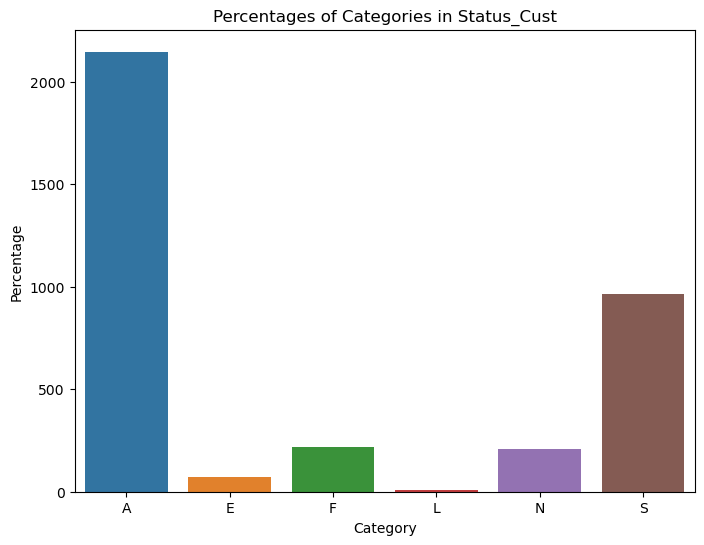

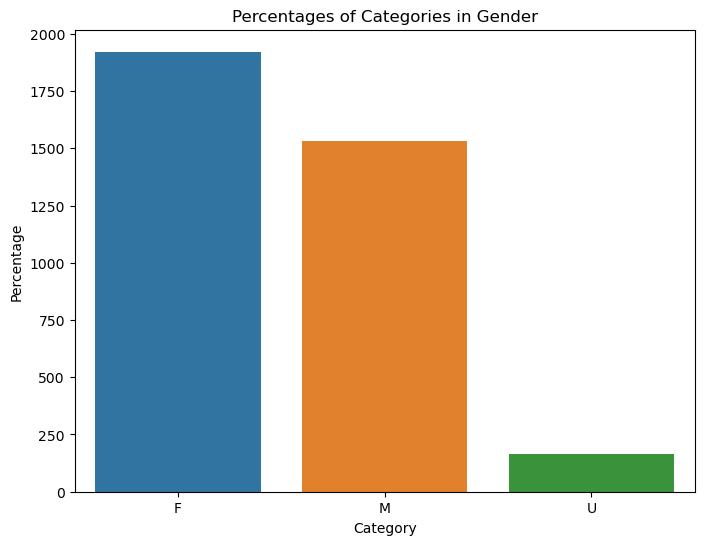

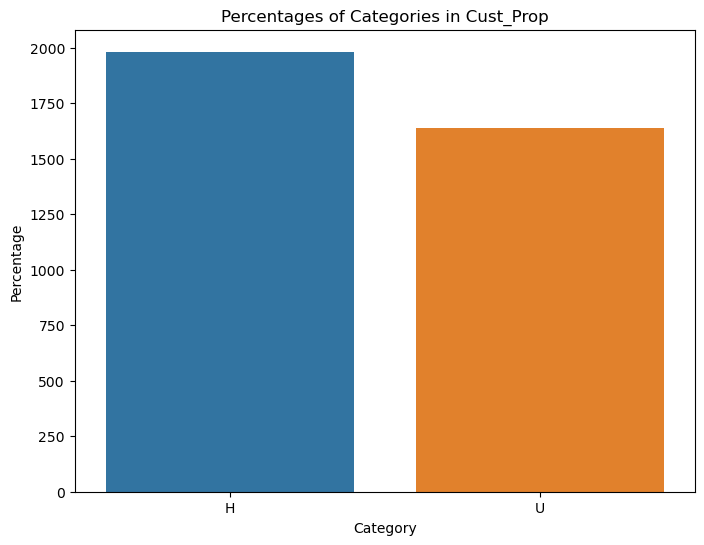

In [104]:
cat_vars = ['Status_Cust', 'Gender', 'Cust_Prop', ]

for var in cat_vars:
    counts = data[var].value_counts()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=counts.index, y=counts.values)
    plt.title('Percentages of Categories in ' + var)
    plt.xlabel('Category')
    plt.ylabel('Percentage')
    plt.show()

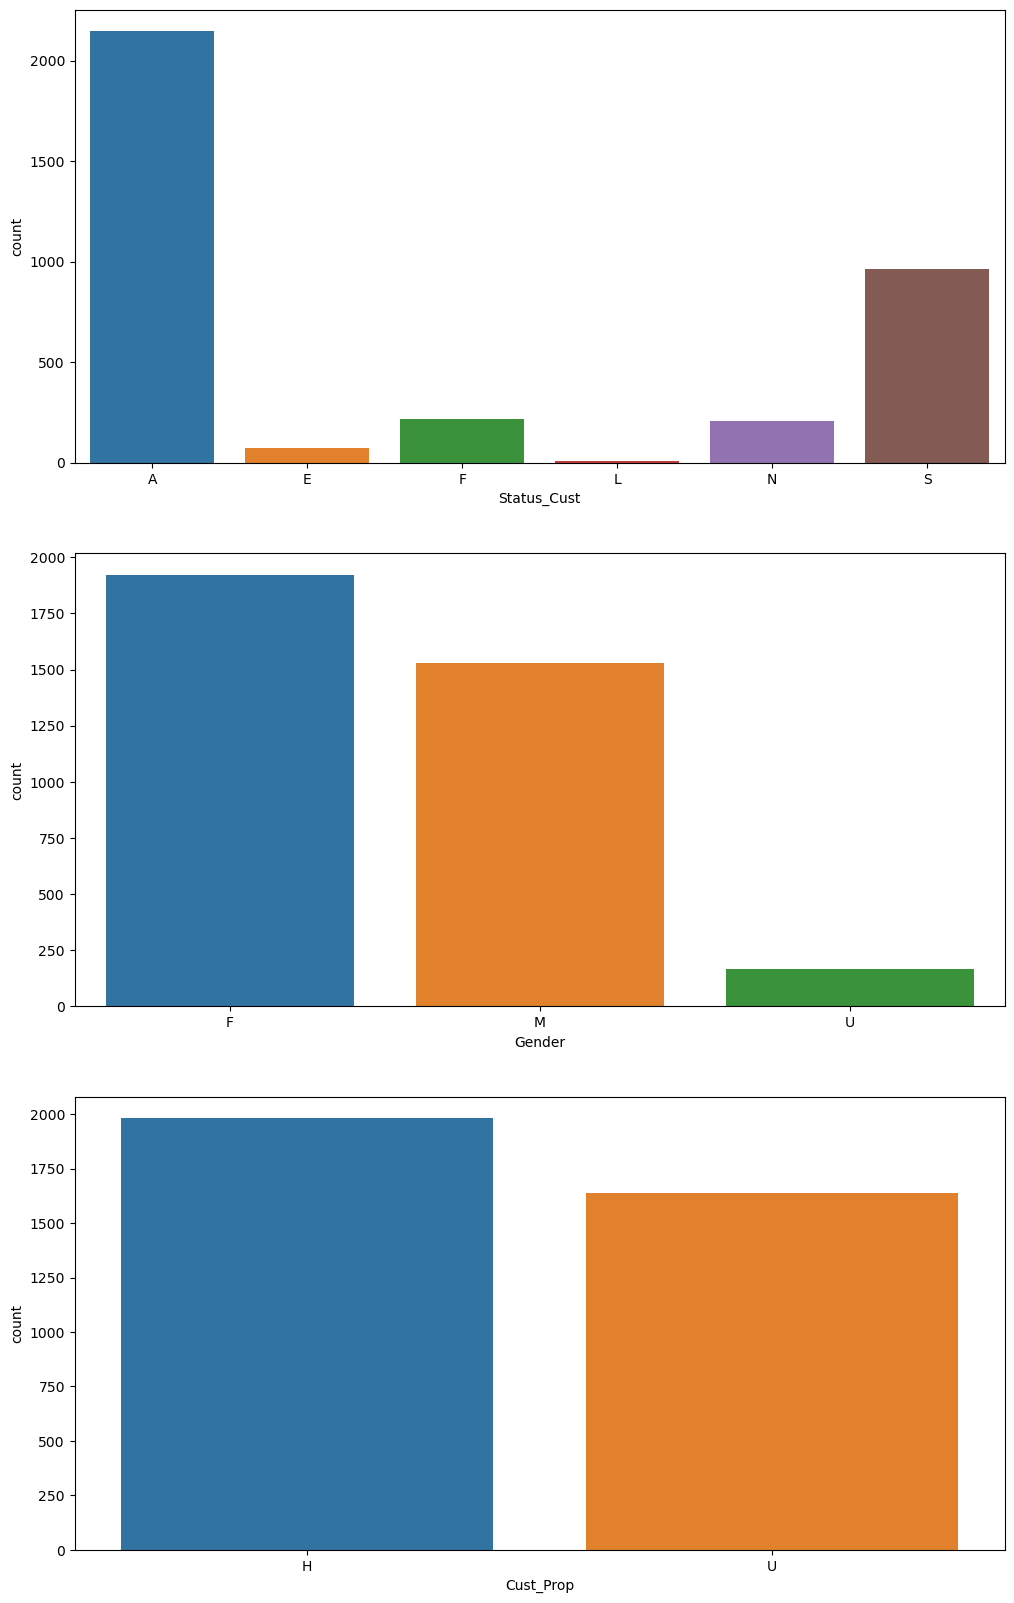

In [93]:
fig, ax=plt.subplots(nrows=len(CatCols), figsize=(12,20))
for i in np.arange(len(CatCols)):
    sns.countplot(x=data[CatCols[i]], ax=ax[i]);

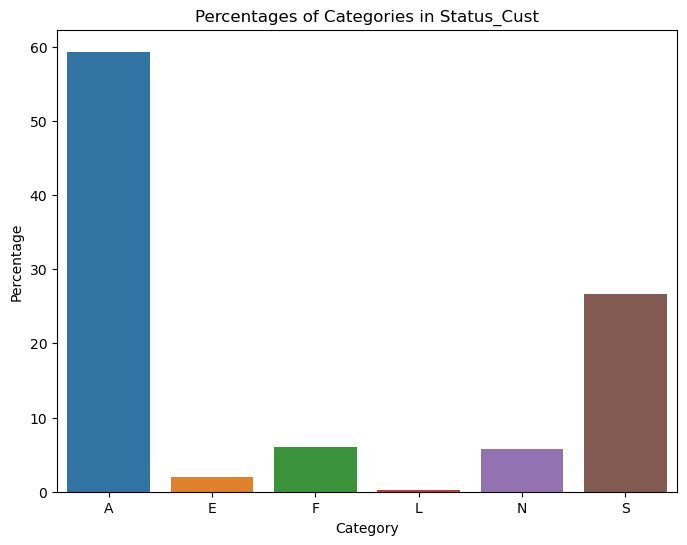

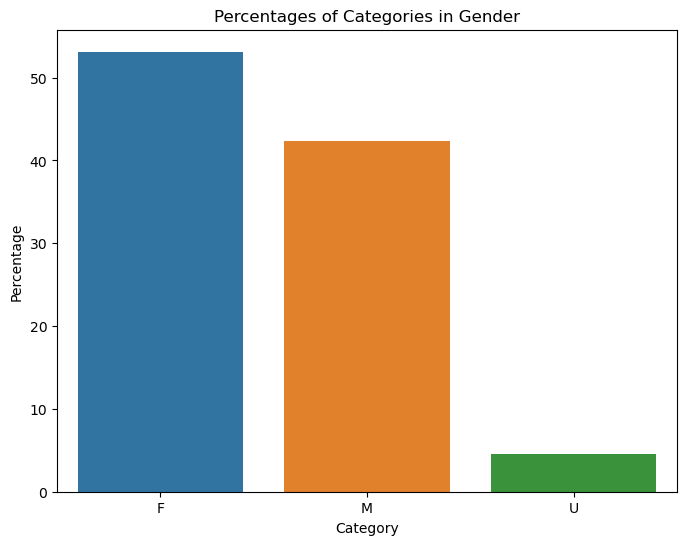

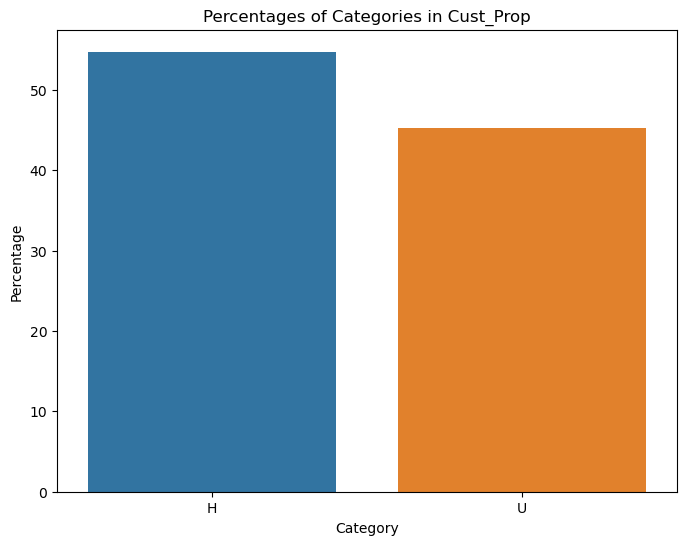

In [94]:
cat_vars = ['Status_Cust', 'Gender', 'Cust_Prop']
for var in cat_vars:
    value_counts = data[var].value_counts()
    proportions = value_counts / len(data)
    percentages = proportions * 100
    plt.figure(figsize=(8, 6))
    sns.barplot(x=percentages.index, y=percentages)
    plt.title('Percentages of Categories in ' + var)
    plt.xlabel('Category')
    plt.ylabel('Percentage')
    plt.show()

### 3.1.1 Insight

In [129]:
print('Status_cust should only have 3 unique index which are Active Buyer (A), Star Buyer (S) and combinations of N, E, F and L as Others')

Status_cust should only have 3 unique index which are Active Buyer (A), Star Buyer (S) and combinations of N, E, F and L as Others


### 3.1.2 Solution

In [ ]:
mapper = { 'A':'A', 'S':'S', 'E':'Other','F':'Other','N':'Other','L':'Other'}
data['Status_Cust_New'] = data['Status_Cust'].replace(mapper)
CatCols = CatCols + ['Status_Cust_New']
CatCols.remove('Status_Cust')

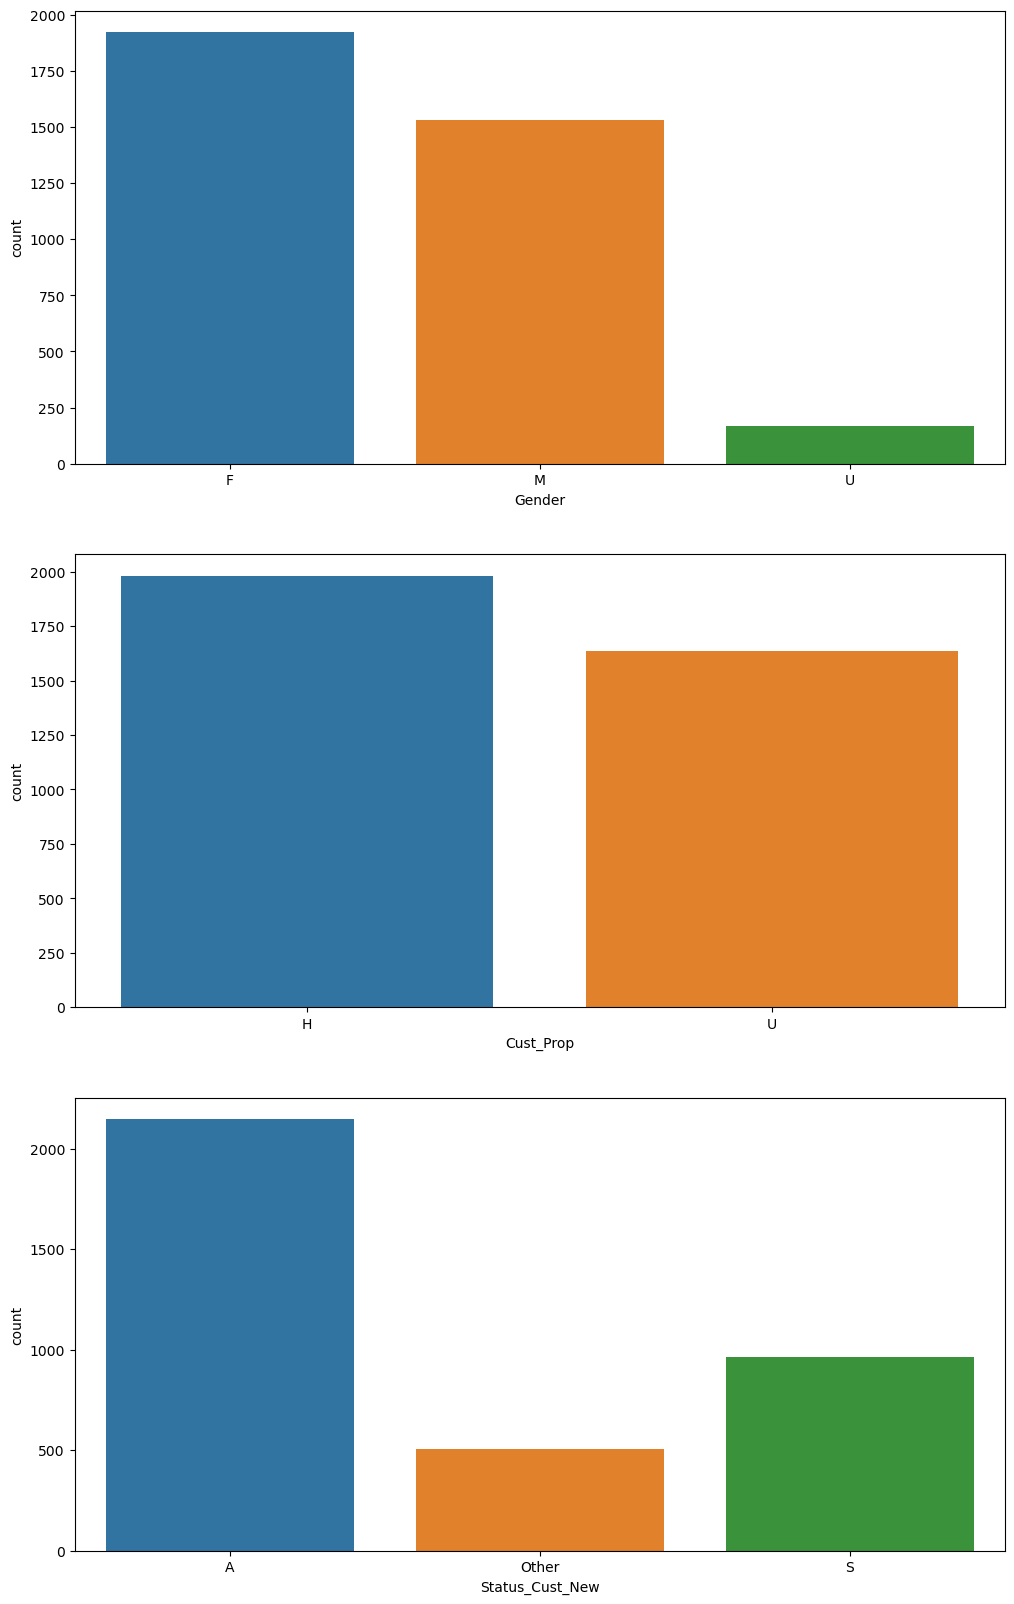

In [152]:
fig, ax=plt.subplots(nrows=len(CatCols), figsize=(12,20))
for i in np.arange(len(CatCols)):
    sns.countplot(x=data[CatCols[i]], ax=ax[i]);

## 3.2 Explore Relationship Between Categorical & Target Variable. Interpret the observation

**Hint**: 
1. Create list of the categorical features:
    `CatFes=list(set(CatCols)-set(['Potential_Customer']))`

2. use `sns.countplot()` to create subplots for each categorical feature and hue=`data.Potential_Customer` to assign color to the plot based on the target variable `Potential_Customer`

In [ ]:
CatFes = list(set(CatCols) - set(['Potential_Customer']))

for feature in CatFes:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Potential_Customer', data=data)
    plt.title(f'{feature} vs Potential Customer')
    plt.show()

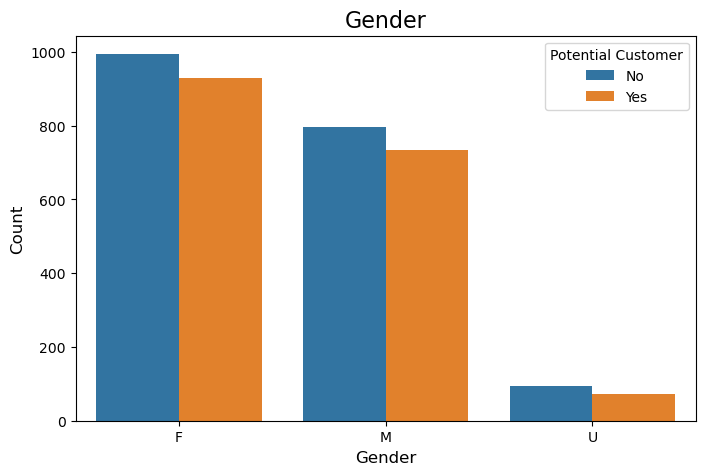

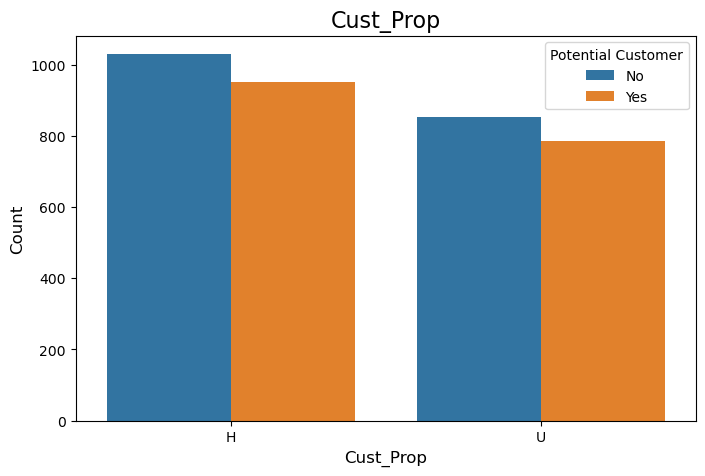

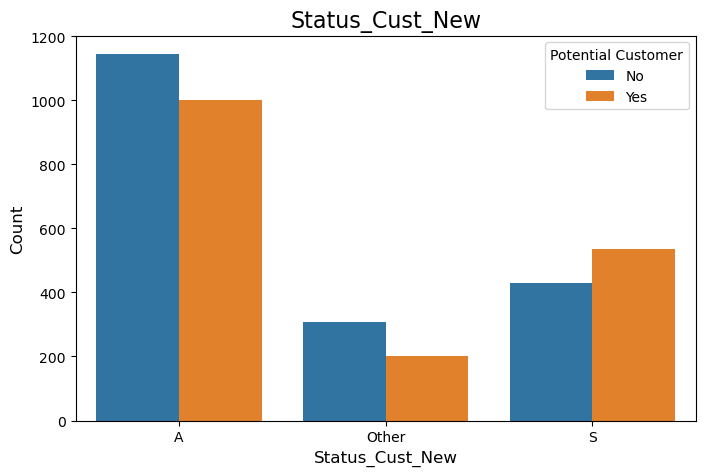

In [144]:
CatFes=list(set(CatCols)-set(['Potential_Customer']))
CatFes

for cat in CatFes:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=data, x=cat, hue="Potential_Customer")
    ax.set_title(cat, fontsize=16)
    ax.set_xlabel(cat, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.legend(title="Potential Customer", loc='upper right', labels=["No", "Yes"])
    plt.show()


### 3.2.1. Insight

In [193]:
print("Based on the Relationship Between Categorical & Target Variable, we can conclude that the Status_Cust_New show a significat result where it shows a higher potential customer")

Based on the Relationship Between Categorical & Target Variable, we can conclude that the Status_Cust_New show a significat result where it shows a higher potential customer


## 3.3 Explore Numerical Variables

**Hint**: use `sns.distplot()` and `sns.boxplot()`

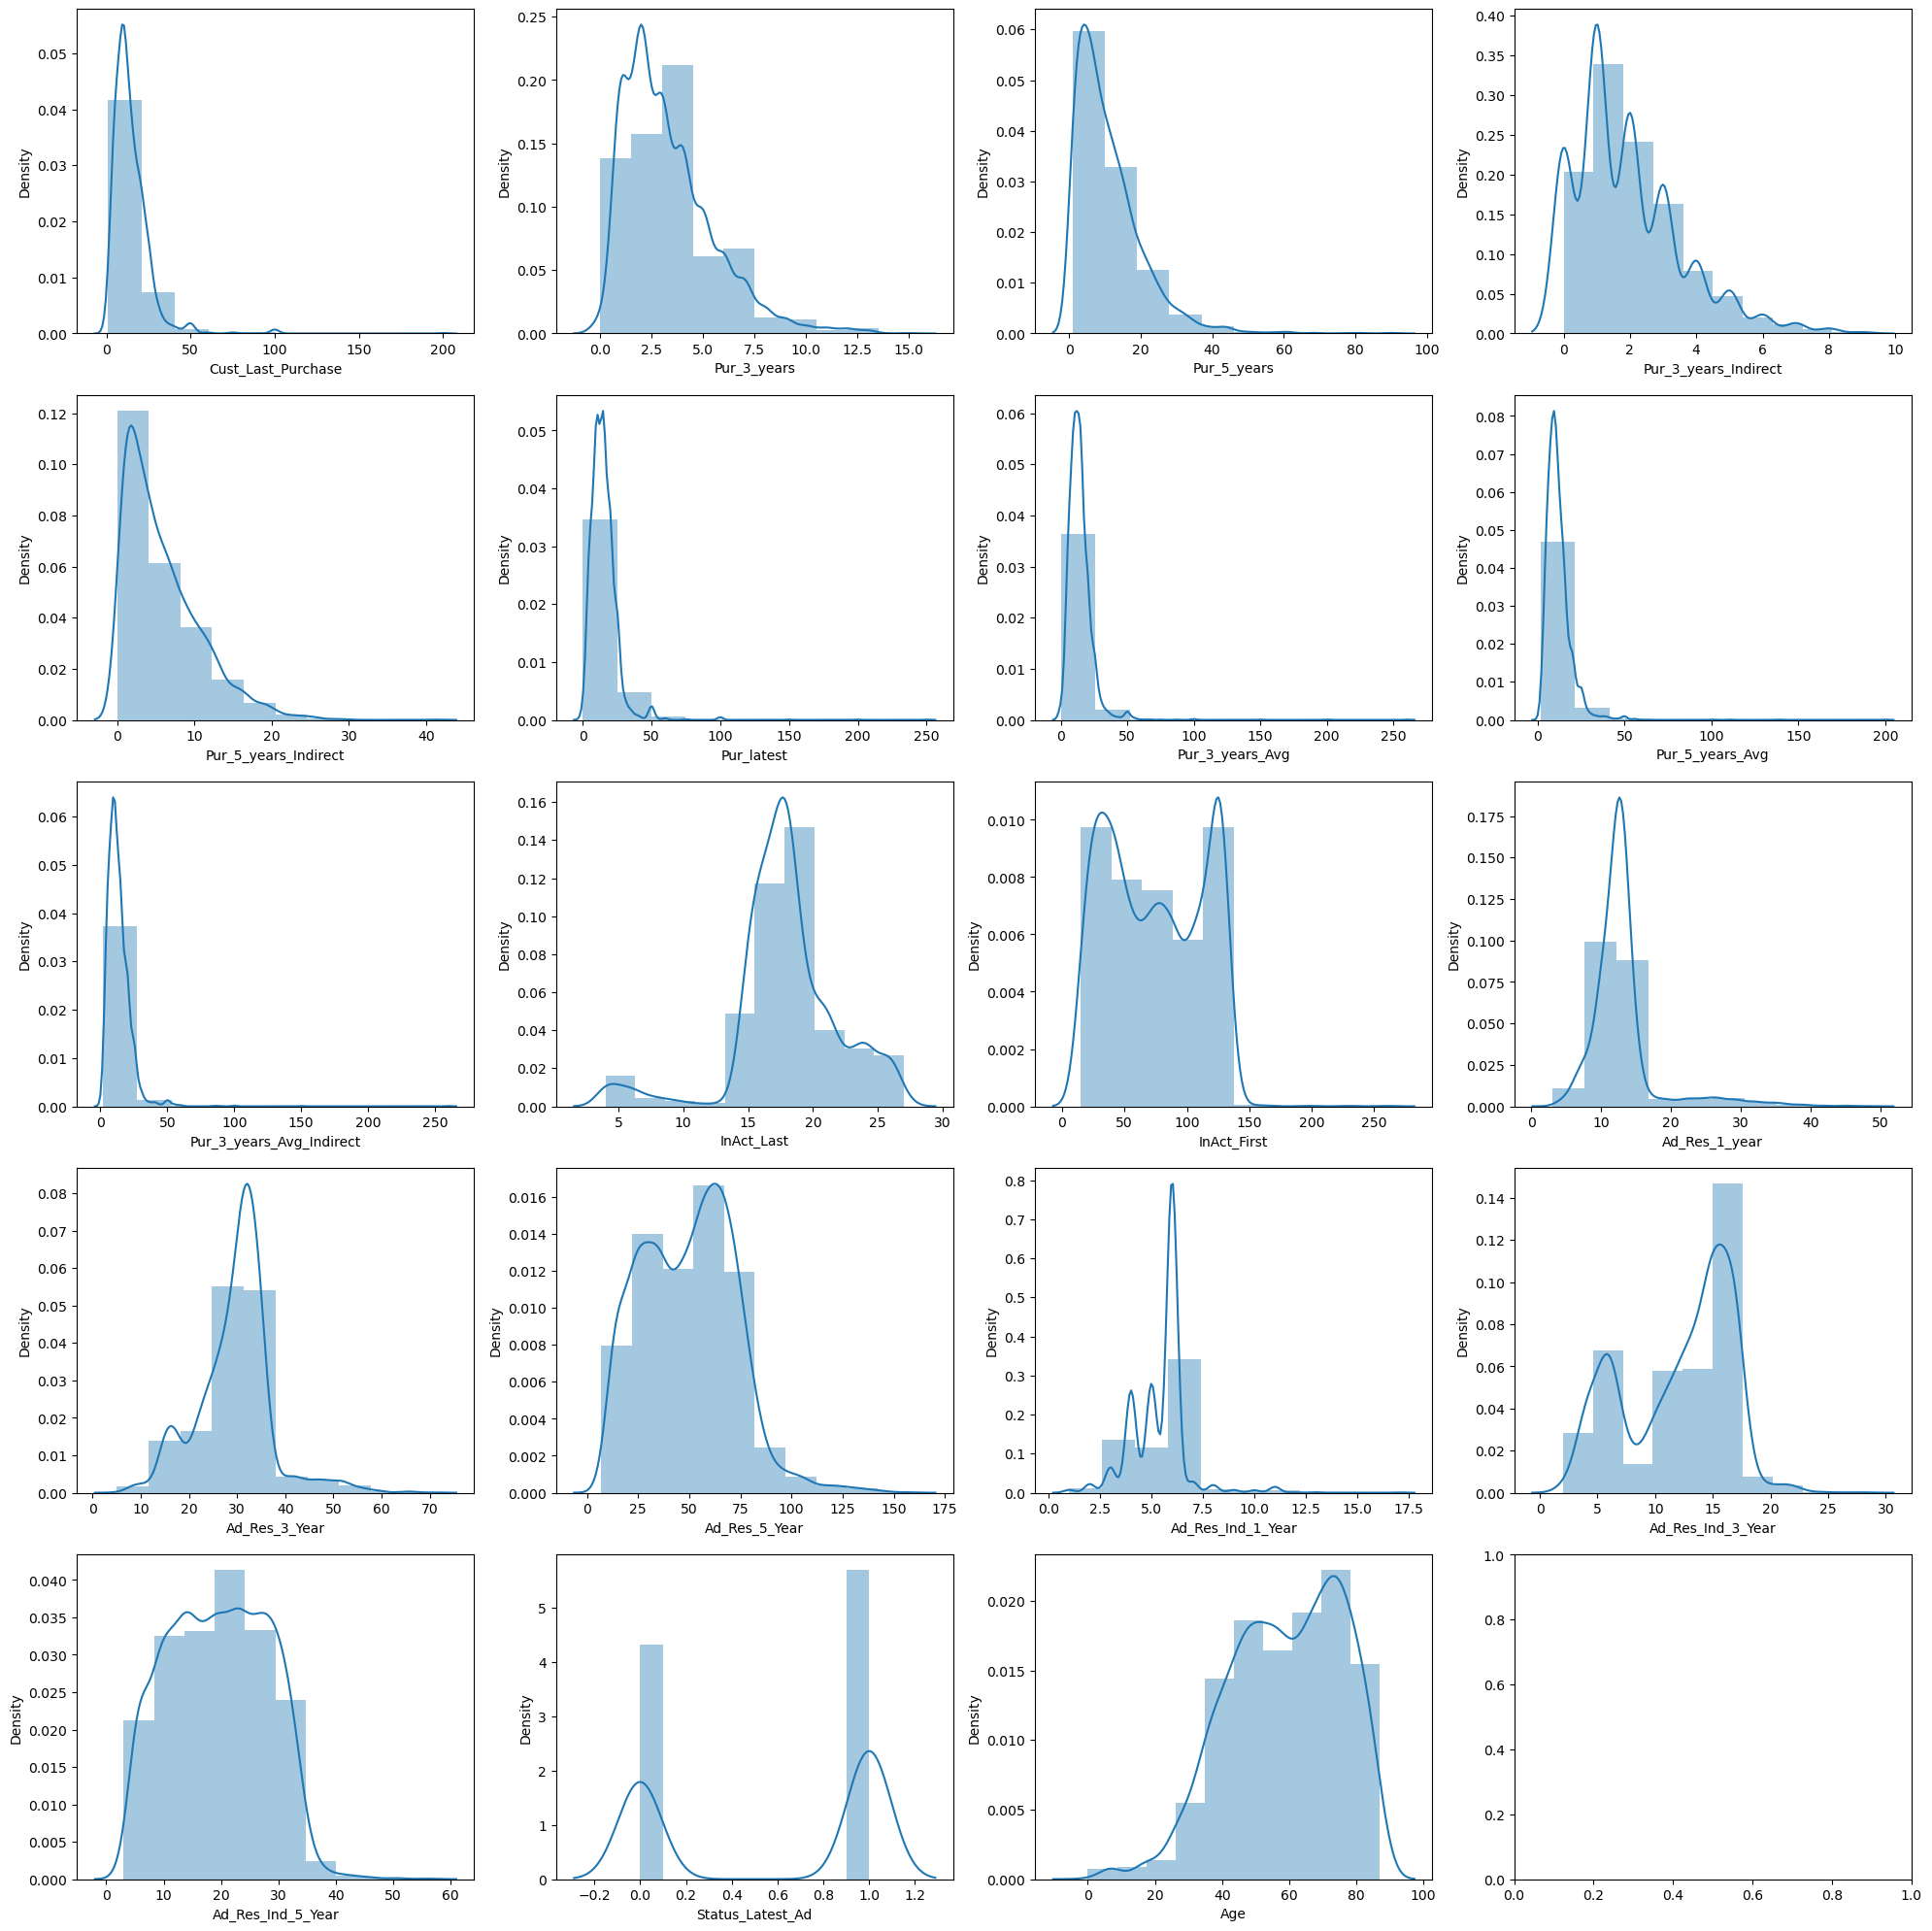

In [169]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

num_cols = ['Cust_Last_Purchase', 'Pur_3_years', 'Pur_5_years', 'Pur_3_years_Indirect',
            'Pur_5_years_Indirect', 'Pur_latest', 'Pur_3_years_Avg', 'Pur_5_years_Avg',
            'Pur_3_years_Avg_Indirect', 'InAct_Last', 'InAct_First', 'Ad_Res_1_year',
            'Ad_Res_3_Year', 'Ad_Res_5_Year', 'Ad_Res_Ind_1_Year', 'Ad_Res_Ind_3_Year',
            'Ad_Res_Ind_5_Year', 'Status_Latest_Ad', 'Age', 'Cust_Ann_Income']

for i in range(5):
    for j in range(4):
        if i == 4 and j == 3:
            break
        sns.distplot(data[num_cols[i*4+j]], ax=ax[i,j], kde=True, bins=10)
plt.tight_layout()
plt.show()


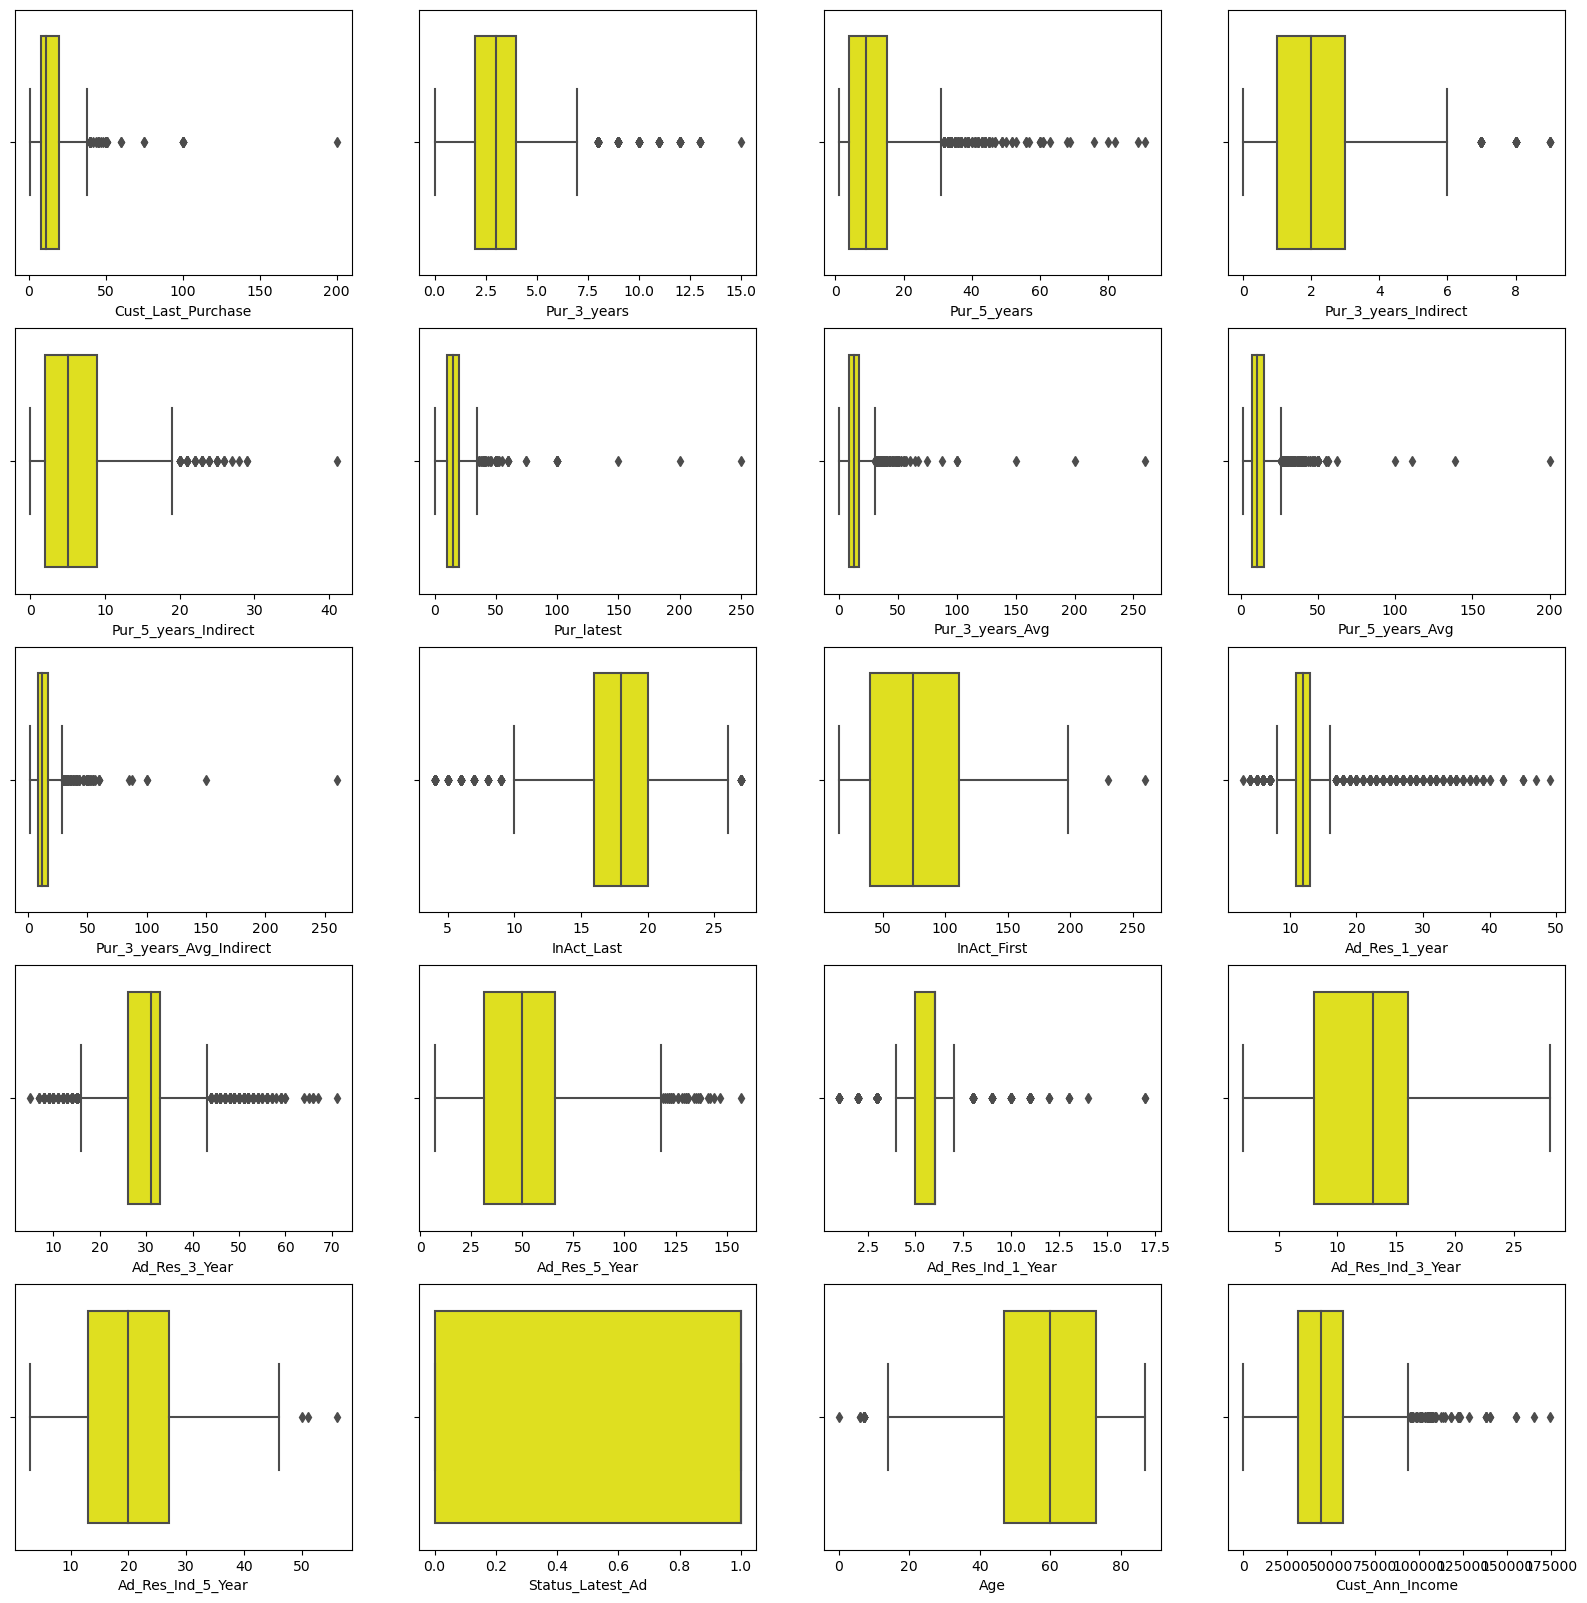

In [184]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

num_cols = ['Cust_Last_Purchase', 'Pur_3_years', 'Pur_5_years', 'Pur_3_years_Indirect',
            'Pur_5_years_Indirect', 'Pur_latest', 'Pur_3_years_Avg', 'Pur_5_years_Avg',
            'Pur_3_years_Avg_Indirect', 'InAct_Last', 'InAct_First', 'Ad_Res_1_year',
            'Ad_Res_3_Year', 'Ad_Res_5_Year', 'Ad_Res_Ind_1_Year', 'Ad_Res_Ind_3_Year',
            'Ad_Res_Ind_5_Year', 'Status_Latest_Ad', 'Age', 'Cust_Ann_Income']

for i in range(5):
    for j in range(4):
        if (i*4+j) < len(num_cols):
            sns.boxplot(x=data[num_cols[i*4+j]], ax=ax[i,j], color='yellow')

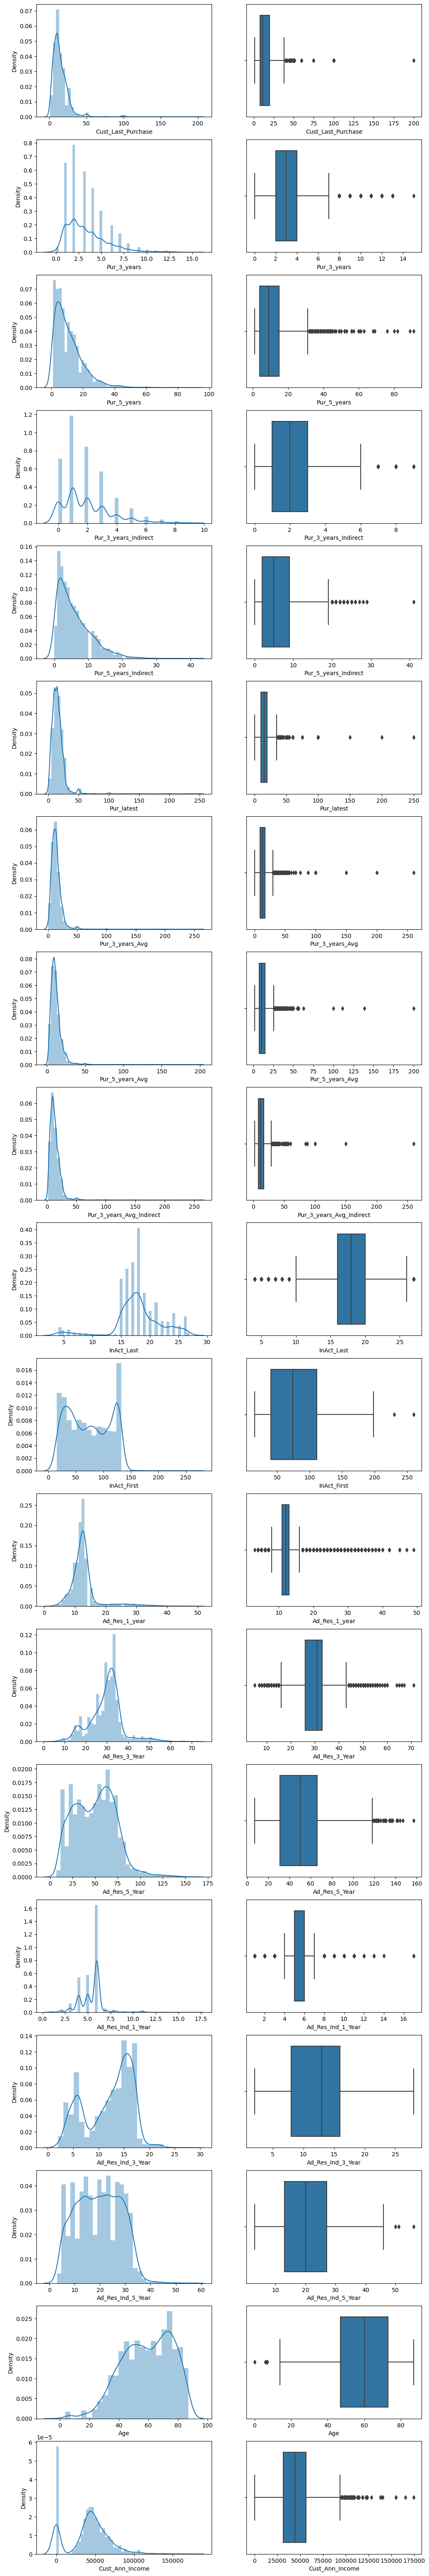

In [185]:
fig, ax = plt.subplots(nrows=len(NumCols), ncols=2, figsize=(12, 80))

for i in range (len(NumCols)) :
    sns.distplot(data[NumCols[i]], ax=ax[i,0])
    sns.boxplot(data[NumCols[i]], ax=ax[i,1]);

### 3.3.1 Insight

['Gender', 'Cust_Prop', 'Status_Cust_New']

## 3.4 Explore the Relationship between Numerical Variables & Target Variable. Interpret your observation

In [187]:
data.groupby('Potential_Customer').median().T

Potential_Customer             0.0        1.0
C_ID                      68469.00  69490.500
Cust_Last_Purchase             NaN     11.000
Pur_3_years                   3.00      3.000
Pur_5_years                   8.00     10.000
Pur_3_years_Indirect          1.00      2.000
Pur_5_years_Indirect          4.00      5.000
Pur_latest                   15.00     12.000
Pur_3_years_Avg              14.33     11.670
Pur_5_years_Avg              11.00      9.635
Pur_3_years_Avg_Indirect     13.00     10.250
InAct_Last                   18.00     18.000
InAct_First                  68.00     76.000
Ad_Res_1_year                12.00     12.500
Ad_Res_3_Year                30.00     31.000
Ad_Res_5_Year                48.00     53.000
Ad_Res_Ind_1_Year             6.00      6.000
Ad_Res_Ind_3_Year            13.00     14.000
Ad_Res_Ind_5_Year            19.00     20.000
Status_Latest_Ad              1.00      1.000
Age                          59.00     62.000
Cust_Ann_Income           44596.00  44022.500

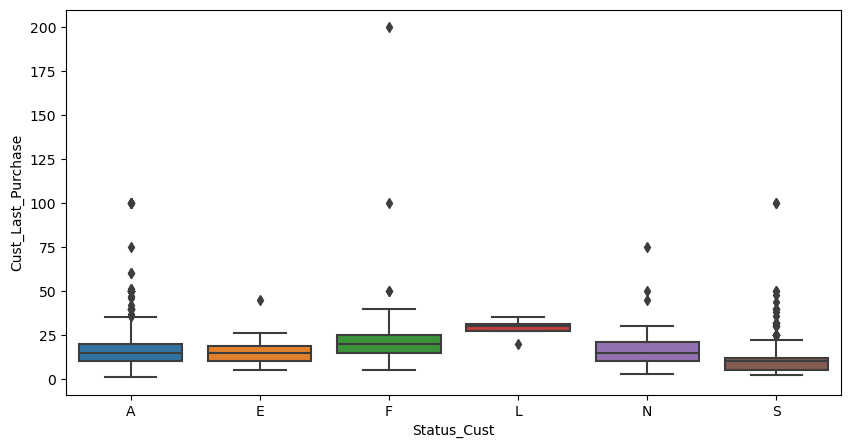

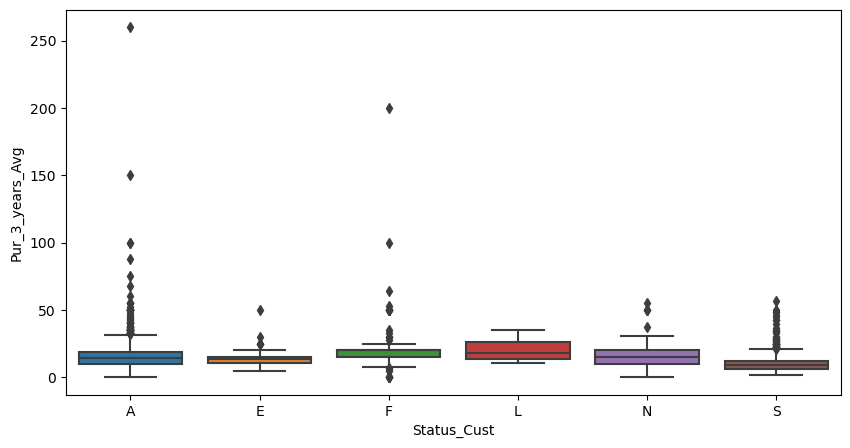

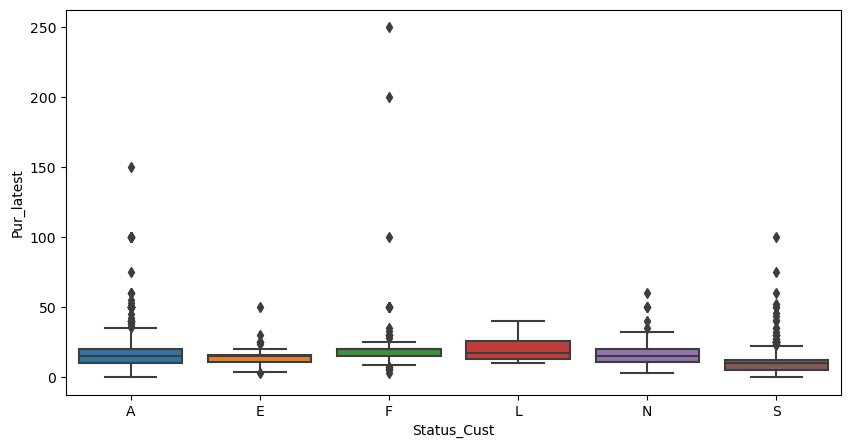

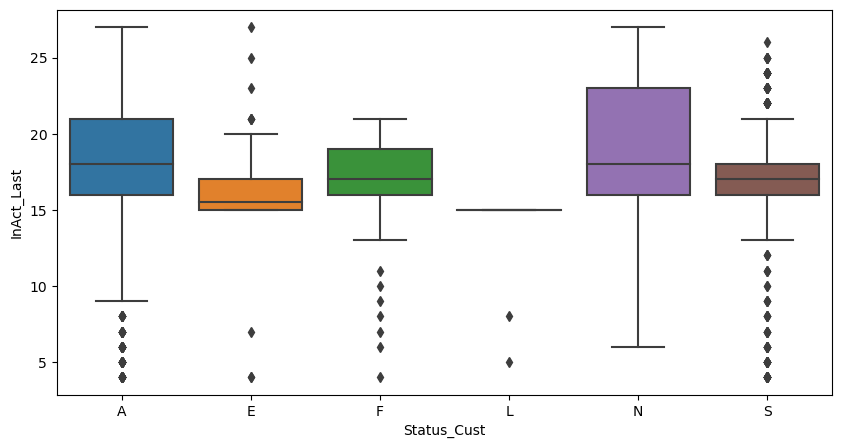

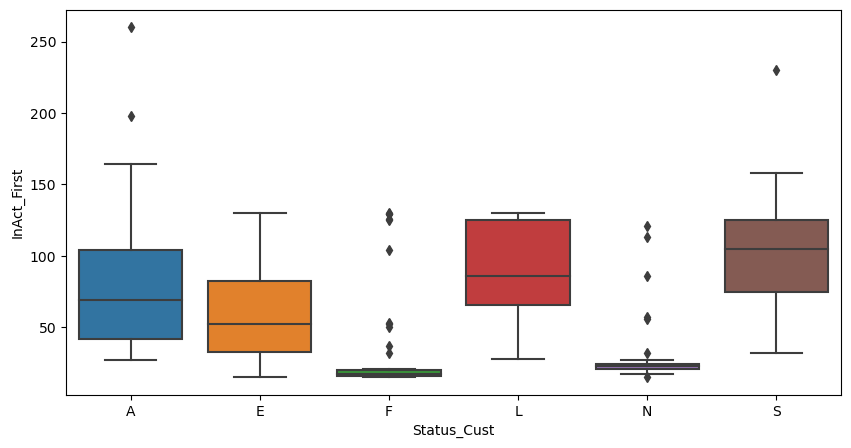

In [189]:
num_cols = ['Cust_Last_Purchase', 'Pur_3_years_Avg', 'Pur_latest', 'InAct_Last', 'InAct_First']

# Plot the relationship between numerical columns and the status cust
for col in num_cols:
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.boxplot(x='Status_Cust', y=col, data=data)
    plt.show()


## 3.5 Explore the Relationship between the columns and try to answer the following questions:

1. Is there any significant difference between men/women's salary?

2. Is there any significant difference between men/women's number of the purchase in the last three years?

3. Is there any significant difference between men/women's average purchase in the last three years?

4. Is there any significant difference between men/women's total purchase in the last three years?

5. (optional) You can explore more about the relationships between the columns, if you believe the insight will improve some dicisions in this company. For instance, sending advertisements to customers regarding gender, customer status, etc.

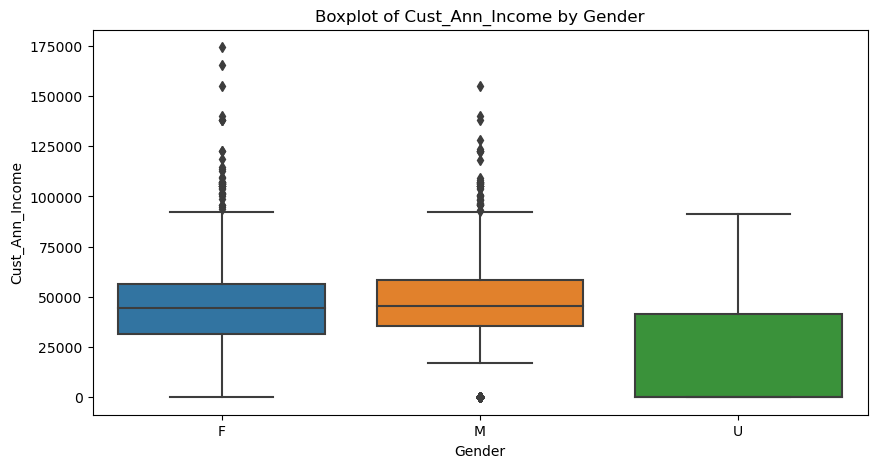

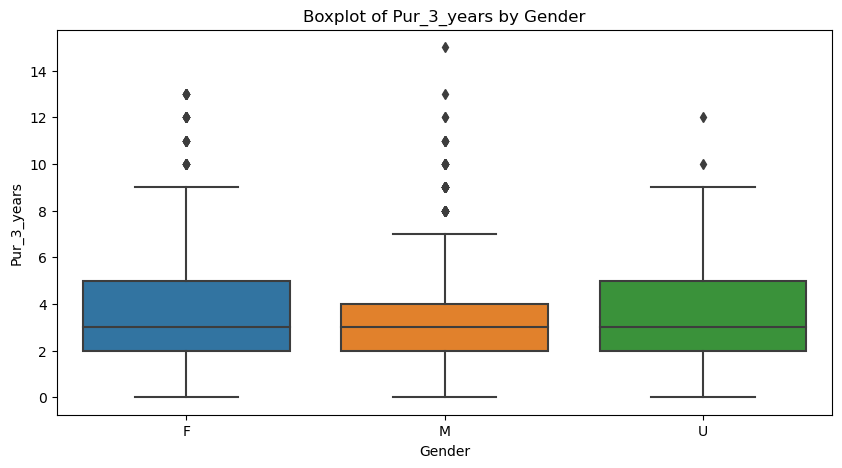

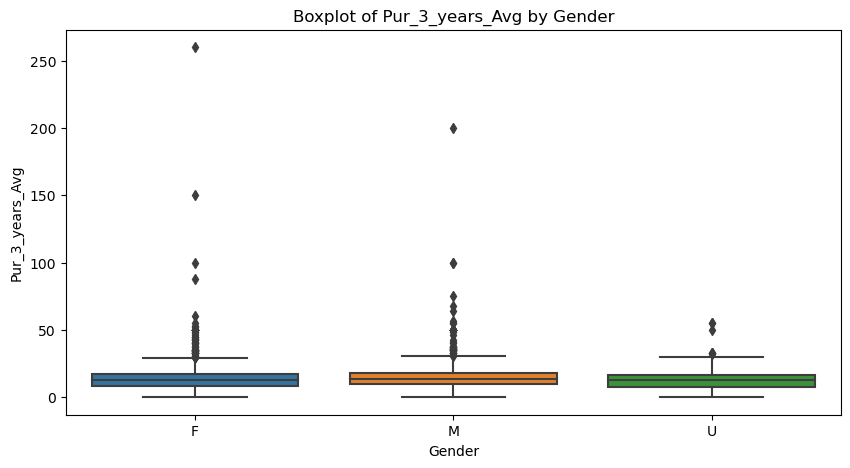

In [219]:
num_cols = ['Cust_Ann_Income', 'Pur_3_years', 'Pur_3_years_Avg']

# Plot the relationship between numerical columns and the status cust
for col in num_cols:
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.boxplot(x='Gender', y=col, data=data)
    ax.set_title('Boxplot of {} by Gender'.format(col))
    plt.show()


In [198]:
# 1 Is there any significant difference between men/women's salary?

from scipy import stats

men_salary = data[data['Gender']=='M']['Cust_Ann_Income']
women_salary = data[data['Gender']=='F']['Cust_Ann_Income']

t, p = stats.ttest_ind(men_salary, women_salary)

if p < 0.05:
    print("p_value = {}, There is a significant difference between men and women's salary".format(round(p, 3)))
else:
    print("p_value = {}, There is no significant difference between men and women's salary".format(round(p, 3)))


p_value = 0.003, There is a significant difference between men and women's salary


In [197]:
# 2. Is there any significant difference between men/women's number of the purchase in the last three years?

men_purchases = data[data['Gender']=='M']['Pur_3_years']
women_purchases = data[data['Gender']=='F']['Pur_3_years']

t, p = stats.ttest_ind(men_purchases, women_purchases)


if p < 0.05:
    print("p_value = {}, There is a significant difference between men and women's number of purchases in the last three years".format(round(p, 3)))
else:
    print("p_value = {}, There is no significant difference between men and women's number of purchases in the last three years".format(round(p, 3)))


p_value = 0.053, There is no significant difference between men and women's number of purchases in the last three years


In [199]:
#3. Is there any significant difference between men/women's average purchase in the last three years?

men_avg_purchase = data[data['Gender']=='M']['Pur_3_years_Avg']
women_avg_purchase = data[data['Gender']=='F']['Pur_3_years_Avg']

t, p = stats.ttest_ind(men_avg_purchase, women_avg_purchase)


if p < 0.05:
    print("p_value = {}, There is a significant difference between men and women's average purchase amount in the last three years".format(round(p, 3)))
else:
    print("p_value = {}, There is no significant difference between men and women's average purchase amount in the last three years".format(round(p, 3)))


p_value = 0.029, There is a significant difference between men and women's average purchase amount in the last three years


In [200]:
# 4. Is there any significant difference between men/women's total purchase in the last three years?

men_total_purchase = data[data['Gender']=='M']['Pur_3_years']*data[data['Gender']=='M']['Pur_3_years_Avg']
women_total_purchase = data[data['Gender']=='F']['Pur_3_years']*data[data['Gender']=='F']['Pur_3_years_Avg']

t, p = stats.ttest_ind(men_total_purchase, women_total_purchase)

if p < 0.05:
    print("p_value = {}, There is a significant difference between men and women's total purchase amount in the last three years".format(round(p, 3)))
else:
    print("p_value = {}, There is no significant difference between men and women's total purchase amount in the last three years".format(round(p, 3)))


p_value = 0.334, There is no significant difference between men and women's total purchase amount in the last three years


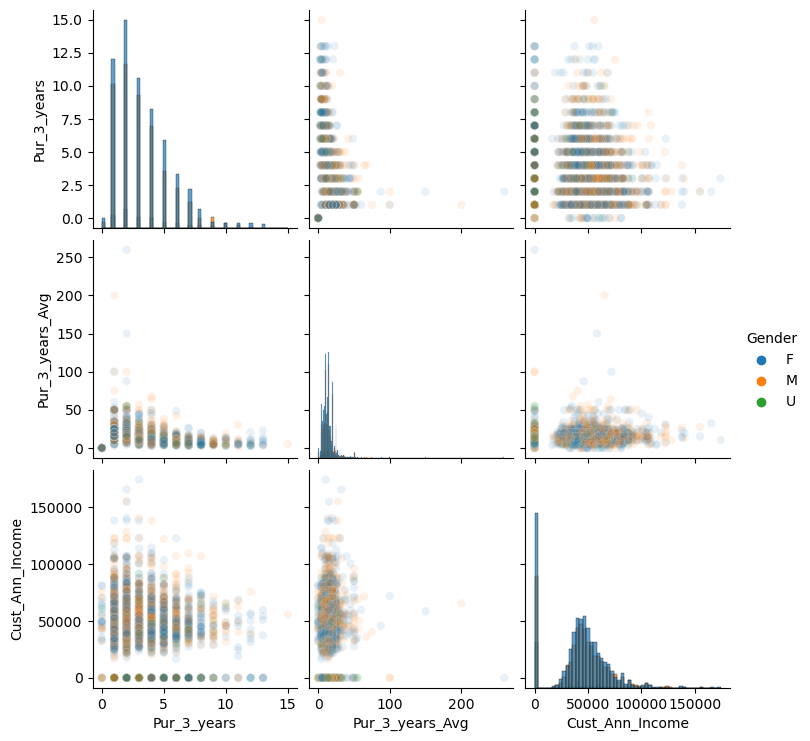

In [203]:
# 5. (optional) You can explore more about the relationships between the columns, if you believe the insight will improve some dicisions in this company. 
# For instance, sending advertisements to customers regarding gender, customer status, etc.

sns.pairplot(data, vars=['Pur_3_years', 'Pur_3_years_Avg', 'Cust_Ann_Income'], hue='Gender', diag_kind='hist', diag_kws={'alpha': 0.7}, plot_kws={'alpha': 0.1})


TypeError: format expected at most 2 arguments, got 4

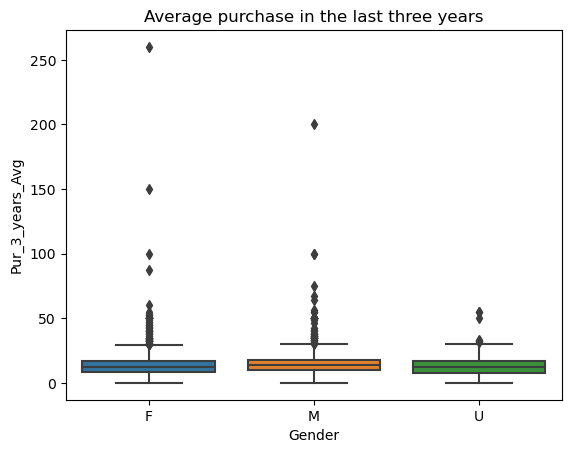

In [202]:
sns.boxplot(x='Gender', y=data.Pur_3_years_Avg, data=data).\
    set_title('Average purchase in the last three years')
format(data[data.Gender=='F']['Pur_3_years_Avg'].mean(),
       data[data.Gender=='F']['Pur_3_years_Avg'].median(),
       data[data.Gender=='M']['Pur_3_years_Avg'].mean(),
       data[data.Gender=='M']['Pur_3_years_Avg'].median())
plt.show()

# 4. Feature Enginearing

## 4.1 Add Some High Level Features and explore their relationship with the target variable

Sometimes we can use high level features that reflect the interactions between the columns as new features to get better insight and feed more information to our predictive models. Also transformation of some columns can be better options to be fed to the models. For instance, instead of a numerical column, you can use log of the column, square of the column, or any other transformation of the column. The type of interaction, or transformation you should choose, can be defined after Exploratory data analysis or just business insight.

**Example:** Instead of two variables for the number of purchase, and the average amount of purchase, we could calculate the total amount of purchase for the customers. 

In [270]:
NumCols

['Pur_3_years',
 'Pur_5_years',
 'Pur_3_years_Indirect',
 'Pur_5_years_Indirect',
 'Pur_latest',
 'Pur_3_years_Avg',
 'Pur_5_years_Avg',
 'Pur_3_years_Avg_Indirect',
 'InAct_Last',
 'InAct_First',
 'Ad_Res_1_year',
 'Ad_Res_3_Year',
 'Ad_Res_5_Year',
 'Ad_Res_Ind_1_Year',
 'Ad_Res_Ind_3_Year',
 'Ad_Res_Ind_5_Year',
 'Age',
 'Cust_Ann_Income']

In [274]:
data['Pur_5_years_Total'] = data['Pur_5_years']*data['Pur_5_years_Avg']
data['Pur_3_years_Total'] = data['Pur_3_years']*data['Pur_3_years_Avg']
data['Ad_Res_Rate_3_years'] = data['Pur_3_years']/(data['Ad_Res_3_Year']+data['Ad_Res_Ind_3_Year']+1)

data['log_Pur_3_years_Indirect'] = np.log(data['Pur_3_years_Indirect']+1)
data['log_Pur_latest'] = np.log(data['Pur_latest']+1)
data['log_Pur_3_years'] = np.log(data['Pur_3_years']+1)
data['log_Pur_3_years_Avg_Indirect'] = np.log(data['Pur_3_years_Avg_Indirect']+1)
data['log_Pur_5_years_Indirect'] = np.log(data['Pur_5_years_Indirect']+1)
data['log_Pur_3_years_Avg'] = np.log(data['Pur_3_years_Avg']+1)
data['log_Pur_5_years'] = np.log(data['Pur_5_years']+1)
data['log_Ad_Res_Rate_3_years'] = np.log(data['Ad_Res_Rate_3_years']+1)
data['log_Pur_5_years_Total'] = np.log(data['Pur_5_years_Total']+1)
data['log_Pur_3_years_Total'] = np.log(data['Pur_3_years_Total']+1)

NewCols = ['Pur_5_years_Total', 'Pur_3_years_Total', 'Ad_Res_Rate_3_years', 
           'log_Pur_3_years_Indirect', 'log_Pur_latest', 'log_Pur_3_years',
           'log_Pur_3_years_Avg_Indirect', 'log_Pur_5_years_Indirect', 
           'log_Pur_3_years_Avg', 'log_Pur_5_years', 'log_Ad_Res_Rate_3_years',
           'log_Pur_5_years_Total', 'log_Pur_3_years_Total']

NewNumCols = NewCols+NumCols

In [276]:
data.head()

Potential_Customer      C_ID  Cust_Last_Purchase  Pur_3_years  Pur_5_years  \
0                 1.0    9946.0                 5.0          2.0         17.0   
1                 1.0   87939.0                30.0          1.0          7.0   
2                 0.0   88003.0                 0.0          5.0         12.0   
3                 1.0  188721.0                20.0          1.0         11.0   
4                 1.0   88056.0                 5.0          3.0         15.0   

   Pur_3_years_Indirect  Pur_5_years_Indirect  Pur_latest  Pur_3_years_Avg  \
0                   2.0                   4.0         0.0             7.50   
1                   0.0                   3.0        25.0            25.00   
2                   3.0                   5.0        15.0            15.00   
3                   0.0                   3.0        20.0            20.00   
4                   2.0                   7.0         3.0             4.33   

   Pur_5_years_Avg  ...  log_Pur_3_years_Indirect  log_Pur_latest  \
0             7.76  ...                  1.098612        0.000000   
1            13.00  ...                  0.000000        3.258097   
2            11.25  ...                  1.386294        2.772589   
3            12.45  ...                  0.000000        3.044522   
4             3.80  ...                  1.098612        1.386294   

   log_Pur_3_years  log_Pur_3_years_Avg_Indirect  log_Pur_5_years_Indirect  \
0         1.098612                      2.140066                  1.609438   
1         0.693147                      0.000000                  1.386294   
2         1.791759                      2.751748                  1.791759   
3         0.693147                      0.000000                  1.386294   
4         1.386294                      1.609438                  2.079442   

   log_Pur_3_years_Avg  log_Pur_5_years  log_Ad_Res_Rate_3_years  \
0             2.140066         2.890372                 0.032261   
1             3.258097         2.079442                 0.023530   
2             2.772589         2.564949                 0.090151   
3             3.044522         2.484907                 0.021053   
4             1.673351         2.772589                 0.070618   

   log_Pur_5_years_Total log_Pur_3_years_Total  
0               4.889747              2.772589  
1               4.521789              3.258097  
2               4.912655              4.330733  
3               4.926891              3.044522  
4               4.060443              2.638343  

[5 rows x 39 columns]

In [279]:
data[NewNumCols+['Potential_Customer']].groupby('Potential_Customer').median().T

Potential_Customer                     0.0           1.0
Pur_5_years_Total                79.975000     85.000000
Pur_3_years_Total                32.000000     33.990000
Ad_Res_Rate_3_years               0.060606      0.071429
log_Pur_3_years_Indirect          0.693147      1.098612
log_Pur_latest                    2.772589      2.564949
log_Pur_3_years                   1.386294      1.386294
log_Pur_3_years_Avg_Indirect      2.427454      2.397895
log_Pur_5_years_Indirect          1.609438      1.791759
log_Pur_3_years_Avg               2.729812      2.539237
log_Pur_5_years                   2.197225      2.397895
log_Ad_Res_Rate_3_years           0.058841      0.068993
log_Pur_5_years_Total             4.394140      4.454347
log_Pur_3_years_Total             3.496508      3.555062
Pur_3_years                       3.000000      3.000000
Pur_5_years                       8.000000     10.000000
Pur_3_years_Indirect              1.000000      2.000000
Pur_5_years_Indirect              4.000000      5.000000
Pur_latest                       15.000000     12.000000
Pur_3_years_Avg                  14.330000     11.670000
Pur_5_years_Avg                  11.000000      9.635000
Pur_3_years_Avg_Indirect         10.330000     10.000000
InAct_Last                       18.000000     18.000000
InAct_First                      68.000000     76.000000
Ad_Res_1_year                    12.000000     12.500000
Ad_Res_3_Year                    30.000000     31.000000
Ad_Res_5_Year                    48.000000     53.000000
Ad_Res_Ind_1_Year                 6.000000      6.000000
Ad_Res_Ind_3_Year                13.000000     14.000000
Ad_Res_Ind_5_Year                19.000000     20.000000
Age                              59.000000     62.000000
Cust_Ann_Income               44596.000000  44022.500000

## 4.2 Check Correlation between Numerical Variables

<AxesSubplot:>

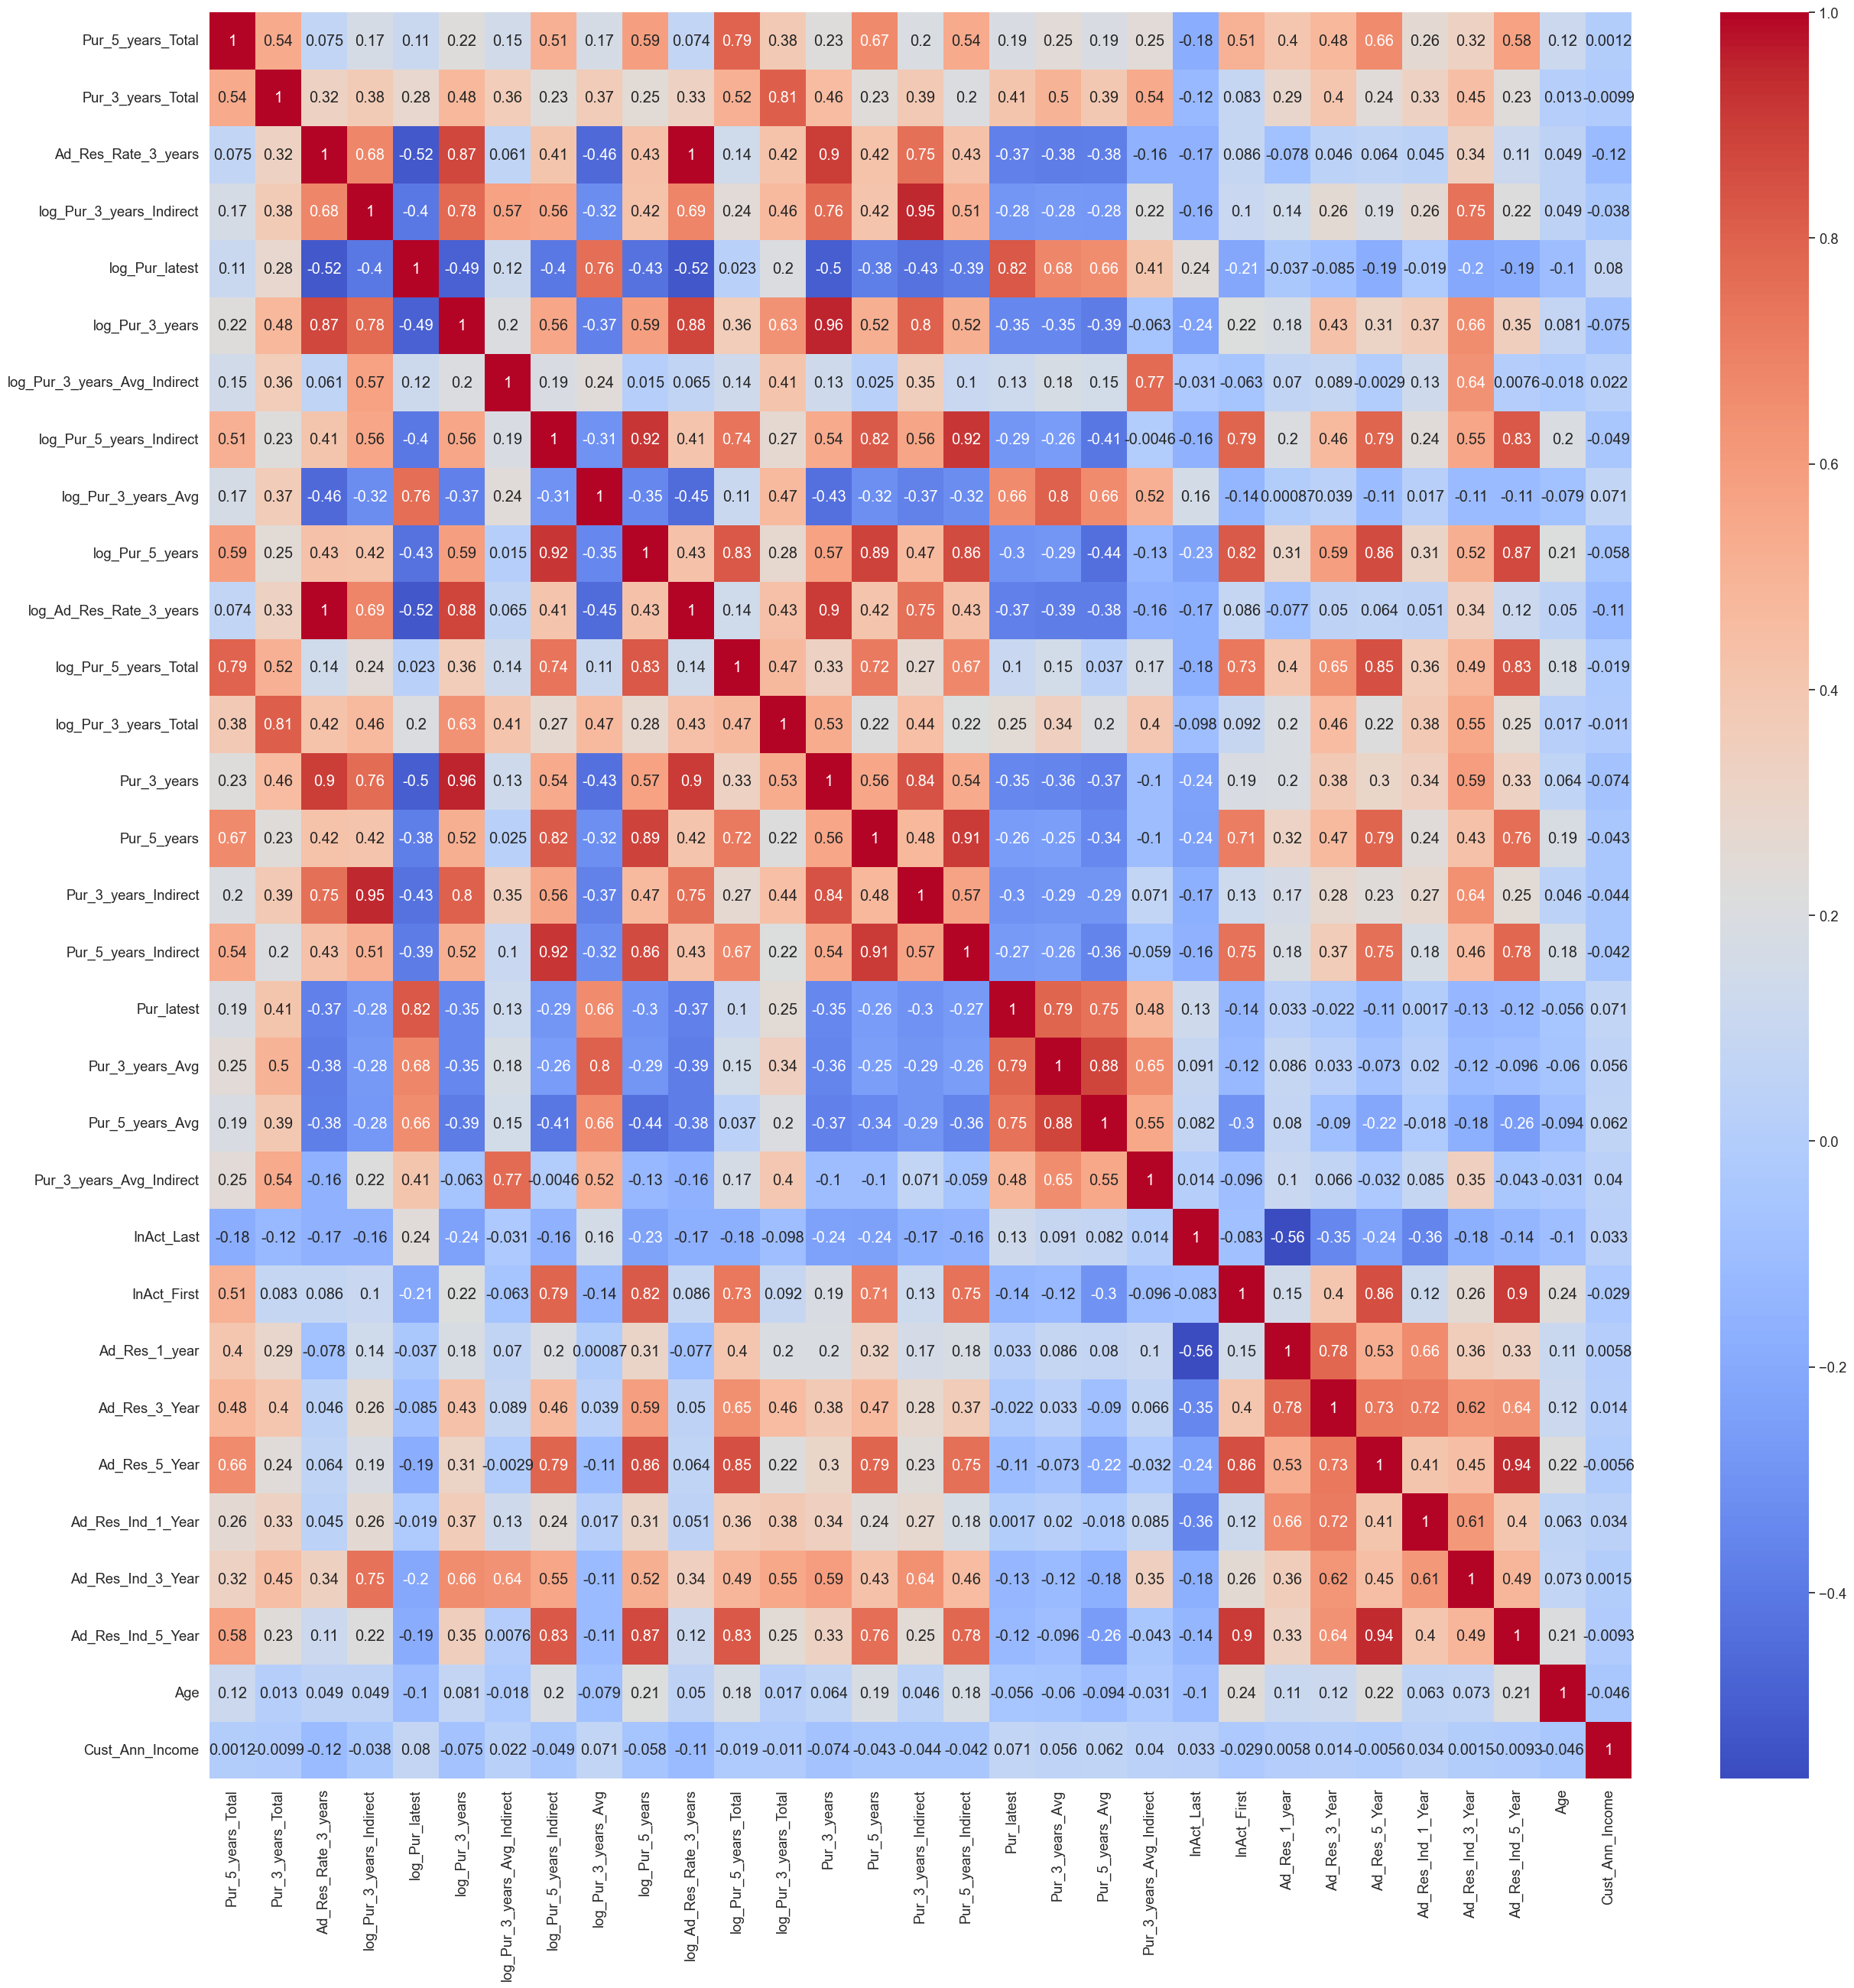

In [281]:
corr = data[NewNumCols].corr()
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(data[NewNumCols].corr(), annot=True, cmap='coolwarm', ax=ax)

# 5. Feature Selection

It is better we do not have numerical columns with high correlations as they confuse the machine learning algorithms. We can manually remove the highly-correlated features, or we can let the PCA handles that during the pre-processing.

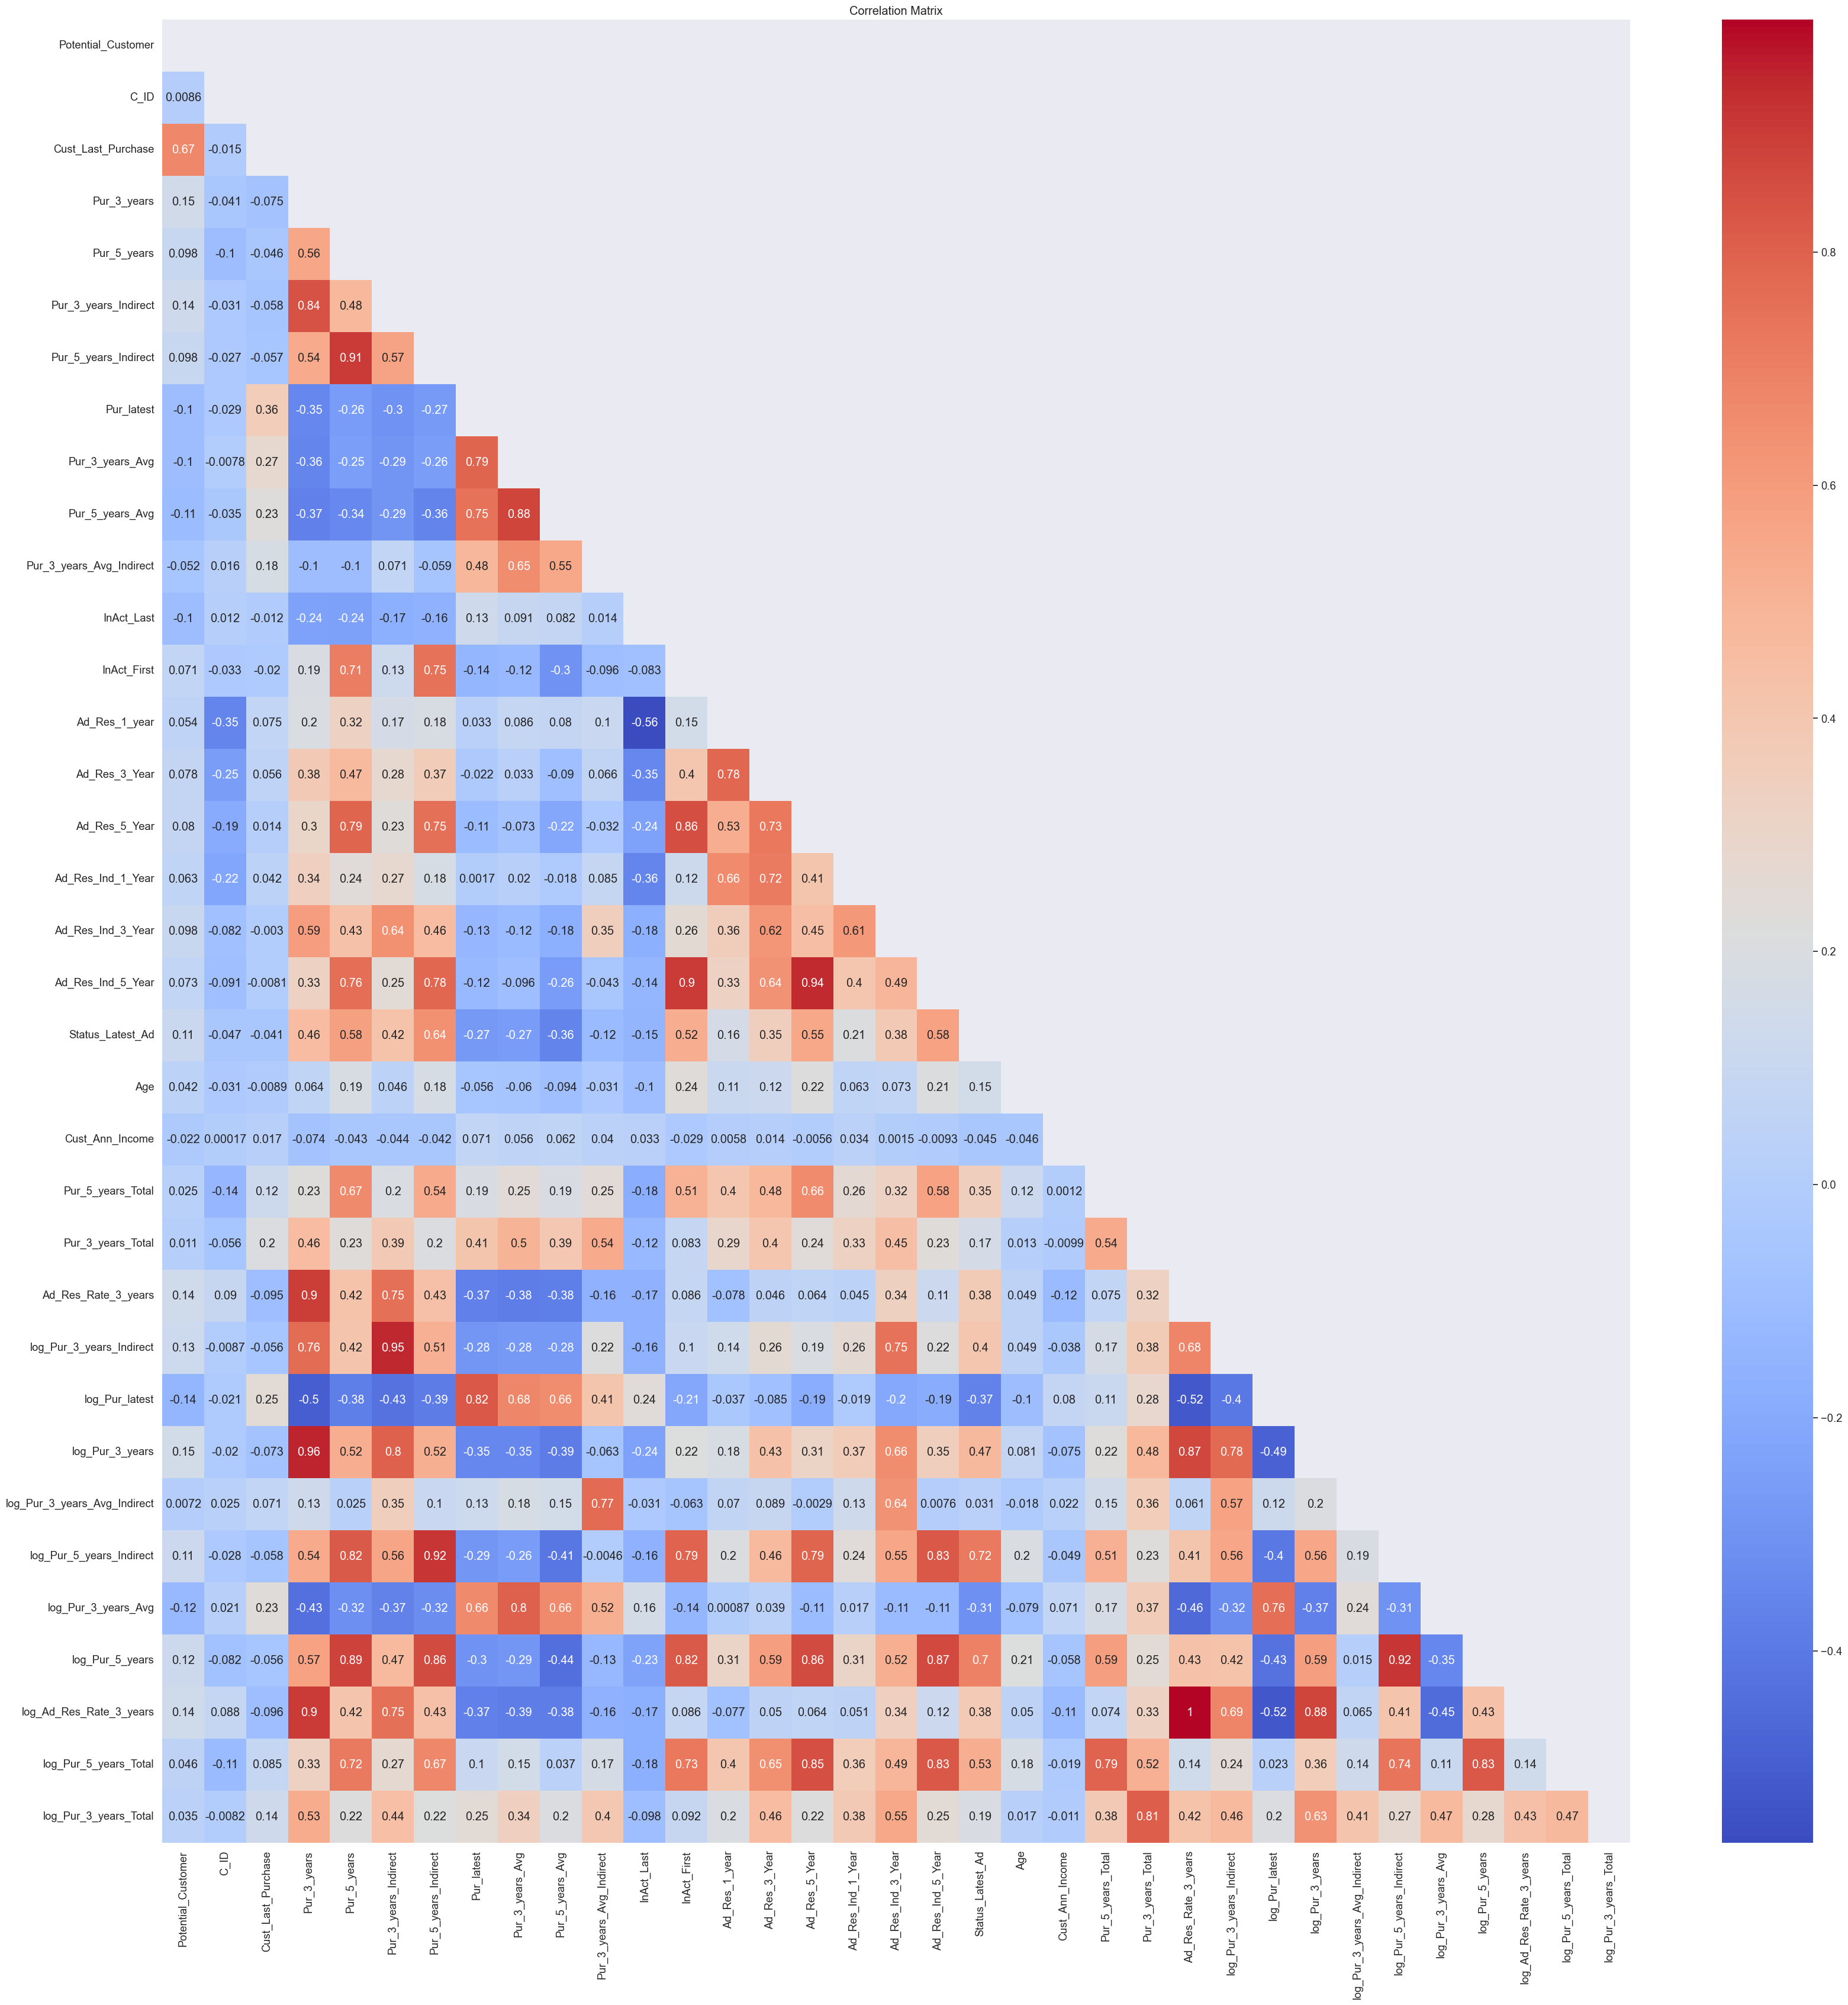

In [284]:
# Create a correlation matrix
corr_matrix = data.corr()

# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a heatmap of the correlation matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(40, 40))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 6. Data PreProcessing

## 6.1 Check the Data for Missing Values
**Hint:**
1. Check which columns have missing values

2. Create a list of the name of the columns that have missing values
    `null_columns=data.columns[data.isnull().any()]`
   
3. Decide how you should handle the missing values for each column:

    a. For some numerical columns missing value simply means 0.
    b. We can fill missing values in a numerical column by replacing mean of the column, if the column is not skewed. If the column is skewed, median might be a better option.

In [320]:
# Check for missing values
null_columns = data.columns[data.isnull().any()]

In [244]:
data.dtypes

Potential_Customer           float64
C_ID                         float64
Cust_Last_Purchase           float64
Pur_3_years                  float64
Pur_5_years                  float64
Pur_3_years_Indirect         float64
Pur_5_years_Indirect         float64
Pur_latest                   float64
Pur_3_years_Avg              float64
Pur_5_years_Avg              float64
Pur_3_years_Avg_Indirect     float64
InAct_Last                   float64
InAct_First                  float64
Ad_Res_1_year                float64
Ad_Res_3_Year                float64
Ad_Res_5_Year                float64
Ad_Res_Ind_1_Year            float64
Ad_Res_Ind_3_Year            float64
Ad_Res_Ind_5_Year            float64
Status_Cust                 category
Status_Latest_Ad             float64
Age                          float64
Gender                      category
Cust_Prop                   category
Cust_Ann_Income              float64
Status_Cust_New             category
dtype: object

In [321]:
# Print the columns with missing values
print(null_columns)

Index([], dtype='object')


In [231]:
data['Cust_Last_Purchase'].fillna(0, inplace=True)

In [234]:
data['Pur_3_years_Avg_Indirect'].fillna(0, inplace=True)

In [312]:
data['Age'].fillna(0, inplace=True)

In [322]:
null_columns = data.columns[data.isnull().any()]
null_columns

Index([], dtype='object')

## 6.2 Separate X (features) and y (target)

**Attention:** Don't forget to exclude the column `Cust_Last_Purchase` from your analysis

In [248]:
NumCols.remove('Cust_Last_Purchase')
Features = NumCols + CatFes
X = data[Features]
y = data['Potential_Customer']

In [249]:
print(X.shape)
print(y.shape)

(3618, 21)
(3618,)


In [297]:
X.dtypes

Pur_3_years                  float64
Pur_5_years                  float64
Pur_3_years_Indirect         float64
Pur_5_years_Indirect         float64
Pur_latest                   float64
Pur_3_years_Avg              float64
Pur_5_years_Avg              float64
Pur_3_years_Avg_Indirect     float64
InAct_Last                   float64
InAct_First                  float64
Ad_Res_1_year                float64
Ad_Res_3_Year                float64
Ad_Res_5_Year                float64
Ad_Res_Ind_1_Year            float64
Ad_Res_Ind_3_Year            float64
Ad_Res_Ind_5_Year            float64
Age                          float64
Cust_Ann_Income              float64
Gender                      category
Cust_Prop                   category
Status_Cust_New             category
dtype: object

In [237]:
y.head()

0     5.0
1    30.0
2     0.0
3    20.0
4     5.0
Name: Cust_Last_Purchase, dtype: float64

## 6.3 Split data to train/test 

Define X and y and split the data into 75/25 train/test set. Use random_state=42 and stratify=y

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42, stratify=y)

In [305]:
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (2713, 21)
y_train.shape (2713,)
X_test.shape (905, 21)
y_test.shape (905,)


In [307]:
y.head()

0    1.0
1    1.0
2    0.0
3    1.0
4    1.0
Name: Potential_Customer, dtype: float64

In [311]:
X.head()

Pur_3_years  Pur_5_years  Pur_3_years_Indirect  Pur_5_years_Indirect  \
0          2.0         17.0                   2.0                   4.0   
1          1.0          7.0                   0.0                   3.0   
2          5.0         12.0                   3.0                   5.0   
3          1.0         11.0                   0.0                   3.0   
4          3.0         15.0                   2.0                   7.0   

   Pur_latest  Pur_3_years_Avg  Pur_5_years_Avg  Pur_3_years_Avg_Indirect  \
0         0.0             7.50             7.76                      7.50   
1        25.0            25.00            13.00                      0.00   
2        15.0            15.00            11.25                     14.67   
3        20.0            20.00            12.45                      0.00   
4         3.0             4.33             3.80                      4.00   

   InAct_Last  InAct_First  ...  Ad_Res_3_Year  Ad_Res_5_Year  \
0        14.0        110.0  ...           48.0           73.0   
1        18.0         75.0  ...           35.0           55.0   
2        19.0         57.0  ...           35.0           53.0   
3         5.0        113.0  ...           38.0           71.0   
4        17.0        118.0  ...           28.0           63.0   

   Ad_Res_Ind_1_Year  Ad_Res_Ind_3_Year  Ad_Res_Ind_5_Year   Age  \
0                3.0               12.0               16.0  71.0   
1                6.0                6.0               22.0   7.0   
2                6.0               17.0               22.0  79.0   
3                8.0                8.0               33.0  73.0   
4                6.0               12.0               24.0  68.0   

   Cust_Ann_Income  Gender Cust_Prop Status_Cust_New  
0          65957.0       F         H               A  
1              0.0       M         U               A  
2              0.0       F         U               S  
3          76293.0       F         U               A  
4         113663.0       F         H               S  

[5 rows x 21 columns]

In [301]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [310]:
y.dtypes

dtype('float64')

In [309]:
X.dtypes

Pur_3_years                  float64
Pur_5_years                  float64
Pur_3_years_Indirect         float64
Pur_5_years_Indirect         float64
Pur_latest                   float64
Pur_3_years_Avg              float64
Pur_5_years_Avg              float64
Pur_3_years_Avg_Indirect     float64
InAct_Last                   float64
InAct_First                  float64
Ad_Res_1_year                float64
Ad_Res_3_Year                float64
Ad_Res_5_Year                float64
Ad_Res_Ind_1_Year            float64
Ad_Res_Ind_3_Year            float64
Ad_Res_Ind_5_Year            float64
Age                          float64
Cust_Ann_Income              float64
Gender                      category
Cust_Prop                   category
Status_Cust_New             category
dtype: object

In [ ]:
model.fit(X, y)

In [356]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
model = LinearRegression().fit(X_train, y_train)
r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))
print("=== Test Size 50% ===")
print("   R2 Train: {:.3f}".format(r2_train))
print("   R2 Test:  {:.3f}".format(r2_test))

=== Test Size 50% ===
   R2 Train: 1.000
   R2 Test:  1.000


In [355]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
print("Intercept: {}".format(model.intercept_))
print("Slope:     {}".format(model.coef_))

Intercept: -6.861178292183467e-14
Slope:     [ 1.00000000e+00  7.58908166e-20  4.57184433e-15  9.47892054e-17
 -5.48202087e-16 -1.56564936e-15 -1.00766201e-16  3.17129436e-16
 -2.80319652e-16  6.59901206e-16  3.14132178e-16  1.85769100e-16
 -2.47847292e-16 -1.40436578e-15  6.92763076e-16  5.40376239e-15
  7.69322503e-16 -1.53297027e-15 -3.45399045e-15 -2.19562207e-17
  9.52915118e-19 -3.49015511e-17 -1.80047157e-16 -1.76370524e-13
 -1.02293496e-15  5.21635053e-15 -3.12784454e-15 -5.42918381e-15
 -1.40298054e-15 -1.49612546e-15 -4.27258353e-16  2.16551084e-13
  3.24553573e-15  9.20815068e-17 -1.81501935e-15  1.81006305e-16
  3.13677578e-16 -6.41502634e-16  2.05340222e-15 -2.99831299e-16
  3.07373841e-15  6.40050568e-16 -1.96183810e-15  2.05340225e-15]


## 6.4 Dummy Variables
Change categorical variables with numerical variabels

In [329]:
X = data.drop(['Cust_Last_Purchase'], axis=1)
y = data['Potential_Customer']

In [330]:
X = pd.get_dummies(X, drop_first=True)

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42, stratify=y)

In [332]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr

LinearRegression()

In [333]:
lr.fit(X_train, y_train)

LinearRegression()

In [334]:
y_pred = lr.predict(X_test)
y_pred

array([ 1.00000000e+00,  1.00000000e+00,  1.11457485e-14,  1.82310471e-14,
        1.00000000e+00, -2.81822792e-14, -1.12176315e-15,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        3.36837421e-14,  1.00000000e+00,  1.00000000e+00, -1.37171003e-14,
        8.28772467e-15,  1.00000000e+00,  1.00000000e+00,  5.31195020e-15,
        1.58024951e-14,  1.42900740e-14,  2.26082470e-14, -3.76406476e-14,
        4.70757077e-15,  1.74013121e-14,  1.23233463e-14,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        4.74276626e-15, -6.09693380e-15, -2.72079847e-14,  1.00000000e+00,
        1.56522829e-14,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
       -3.15048090e-14,  1.00000000e+00, -2.29793503e-15, -7.05453904e-14,
        1.00000000e+00,  1.00000000e+00,  1.88822686e-14, -1.00081491e-14,
        1.80580152e-14,  1.00000000e+00,  1.00000000e+00, -3.95049132e-15,
        1.00000000e+00,  

In [340]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_true=y, y_pred=yfit)
mse

6.720487506870975e-28

In [341]:
from sklearn.metrics import r2_score
r2_score(y_true=y, y_pred=yfit)

1.0

In [342]:
yfit=lr.predict(X)
r2=r2_score(y,yfit)
print(r2)

1.0


In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25
                                                    , random_state=42, stratify=y)
model = lr.fit(X_train, y_train)
r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))
print("=== Test Size 25% ===")
print("   R2 Train: {:.3f}".format(r2_train))
print("   R2 Test:  {:.3f}".format(r2_test))

=== Test Size 25% ===
   R2 Train: 1.000
   R2 Test:  1.000


## 6.5 Feature Scaling

In [349]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Xtrain_scaled, Xtest_scaled, ytrain_scaled, ytest_scaled = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [295]:
data.dtypes

Potential_Customer               float64
C_ID                             float64
Cust_Last_Purchase               float64
Pur_3_years                      float64
Pur_5_years                      float64
Pur_3_years_Indirect             float64
Pur_5_years_Indirect             float64
Pur_latest                       float64
Pur_3_years_Avg                  float64
Pur_5_years_Avg                  float64
Pur_3_years_Avg_Indirect         float64
InAct_Last                       float64
InAct_First                      float64
Ad_Res_1_year                    float64
Ad_Res_3_Year                    float64
Ad_Res_5_Year                    float64
Ad_Res_Ind_1_Year                float64
Ad_Res_Ind_3_Year                float64
Ad_Res_Ind_5_Year                float64
Status_Cust                     category
Status_Latest_Ad                 float64
Age                              float64
Gender                          category
Cust_Prop                       category
Cust_Ann_Income 

## 6.6 PCA on Numerical Columns only

1. Save the above scaled train and test data, as dataframe with proper column names
`X_train_sc=pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)`
2. Separate train and test data for numerical columns only
`train_PCA=X_train_sc[NewNumCols]`, `test_PCA=X_test_sc[NewNumCols]`
3. Define the number of components on `train_PCA`
4. Fit PCA on `train_PCA` 
5. Transform `train_PCA` and `test_PCA` save it as `PCA_train` and `PCA_test`, and save them as DataFrame. Use `PCA_train.index=X_train.index` to make sure `PCA_train` have the same index with `X_train` because we need to concat this data to the dummy variables. Do the same on `PCA_test`
6. Concat `PCA_train` to the dummy variables in `X_train` save it as `X_train_pca`
7. Concat `PCA_test` to the dummy variables in `X_test` save it as `X_train_pca`

In [361]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [363]:
# Save the scaled train and test data with proper column names
X_train_sc = pd.DataFrame(scaler.transform(Xtrain_scaled), columns=Xtrain_scaled.columns)
X_test_sc = pd.DataFrame(scaler.transform(Xtest_scaled), columns=Xtest_scaled.columns)

In [368]:
NewNumCols = list(data.drop(['Cust_Last_Purchase', 'Potential_Customer'], axis=1).select_dtypes(include=['float64', 'int64']).columns)

In [369]:
train_PCA=X_train_sc[NewNumCols]
test_PCA=X_test_sc[NewNumCols]

In [370]:
train_PCA

C_ID  Pur_3_years  Pur_5_years  Pur_3_years_Indirect  \
0    -1.802630     0.316341     1.912032              0.055967   
1    -1.974433     0.773968     1.167687              1.286911   
2    -0.151574     0.773968    -0.321004              0.055967   
3     0.880086     1.231594    -0.427339              0.671439   
4     0.933616    -0.141285     0.423342              0.055967   
...        ...          ...          ...                   ...   
2708  3.395536     1.689220     3.613393              2.517854   
2709 -0.109990    -0.598911    -0.746344             -0.559504   
2710  0.085169    -0.141285     1.061352             -1.174976   
2711 -0.415532     0.316341    -0.321004              0.055967   
2712  0.843771    -0.598911     1.061352             -1.174976   

      Pur_5_years_Indirect  Pur_latest  Pur_3_years_Avg  Pur_5_years_Avg  \
0                 0.634753   -0.858606        -0.676969        -0.803366   
1                 1.450502   -0.673309        -0.567612        -0.633086   
2                -0.588870   -0.488012        -0.468197        -0.486421   
3                -0.588870   -0.951254        -1.157142        -1.161327   
4                 0.634753   -0.488012        -0.296210        -0.287554   
...                    ...         ...              ...              ...   
2708              4.305624   -0.024769        -0.016854        -0.262695   
2709             -0.792808   -0.024769        -0.229602        -0.362129   
2710              1.042628   -0.395363        -0.395625        -0.812067   
2711             -0.792808   -0.024769        -0.204748         0.057978   
2712              1.450502   -0.024769        -0.080480        -0.717605   

      Pur_3_years_Avg_Indirect  InAct_Last  ...  log_Pur_3_years_Indirect  \
0                    -0.400034   -3.361980  ...                  0.325986   
1                    -0.253571   -2.155604  ...                  1.230012   
2                    -0.058287   -0.225403  ...                  0.325986   
3                    -0.790602   -0.225403  ...                  0.835107   
4                     0.088175    0.015872  ...                  0.325986   
...                        ...         ...  ...                       ...   
2708                  0.202416   -0.466679  ...                  1.825478   
2709                  0.381101   -0.225403  ...                 -0.391580   
2710                 -1.083527   -0.466679  ...                 -1.618266   
2711                  0.234638    0.980972  ...                  0.325986   
2712                 -1.083527    0.015872  ...                 -1.618266   

      log_Pur_latest  log_Pur_3_years  log_Pur_3_years_Avg_Indirect  \
0          -1.256384         0.549891                      0.002614   
1          -0.801706         0.925944                      0.160787   
2          -0.438653         0.925944                      0.336636   
3          -1.535273         1.243892                     -0.635367   
4          -0.438653         0.089640                      0.449481   
...              ...              ...                           ...   
2708        0.239241         1.519312                      0.528800   
2709        0.239241        -0.503728                      0.640594   
2710       -0.281233         0.089640                     -1.911327   
2711        0.239241         0.549891                      0.549989   
2712        0.239241        -0.503728                     -1.911327   

      log_Pur_5_years_Indirect  log_Pur_3_years_Avg  log_Pur_5_years  \
0                     0.842623            -0.806050         1.533537   
1                     1.291861            -0.585659         1.193620   
2                    -0.380756            -0.406208        -0.006717   
3                    -0.380756            -2.327044        -0.157398   
4                     0.842623            -0.132422         0.729352   
...                        ...                  ...              ...   
2708                  

In [371]:
# Define the number of components on train_PCA
n_components = 5

In [373]:
# Fit PCA on train_PCA
pca = PCA(n_components=n_components, random_state=42)
pca.fit(train_PCA)

PCA(n_components=5, random_state=42)

In [375]:
# Transform train_PCA and test_PCA
PCA_train = pd.DataFrame(pca.transform(train_PCA), columns=['PC{}'.format(i) for i in range(1, n_components+1)])
PCA_train.index = Xtrain_scaled.index
PCA_test = pd.DataFrame(pca.transform(test_PCA), columns=['PC{}'.format(i) for i in range(1, n_components+1)])
PCA_test.index = Xtest_scaled.index

In [376]:
# Transform train_PCA and test_PCA
PCA_train = pd.DataFrame(pca.transform(train_PCA), columns=['PC{}'.format(i) for i in range(1, n_components+1)])
PCA_train.index = Xtrain_scaled.index
PCA_test = pd.DataFrame(pca.transform(test_PCA), columns=['PC{}'.format(i) for i in range(1, n_components+1)])
PCA_test.index = Xtest_scaled.index

# Concatenate PCA_train to the dummy variables in X_train and save as X_train_pca
X_train_pca = pd.concat([Xtrain_scaled, PCA_train], axis=1)

# Concatenate PCA_test to the dummy variables in X_test and save as X_test_pca
X_test_pca = pd.concat([Xtest_scaled, PCA_test], axis=1)

# 7. Objective 1: Machine Learning
    
**1. Design a predictive model to determine the potential customers who will purchase if you send the advertisement .** The target variable is `Potential_Customer`. 

    **Attention:** Because the column `Cust_Last_Purchase` relates to the target variable `Potential_Customer`, you need to exclude it from your model.


Apply various ML algorithms on the data, evaluate them after Grid Search and Cross Validation, and choose the best model.

In [379]:
def Best_Model(train, test, y_train, y_test, model, params, CV=3, **kwargs):
    param_grid = params
    grid = GridSearchCV(model, param_gird, cv=CV,
                        scoring = 'recall', return_train_score = True)
    grid.fit(train,y_train)
    best_par = grid.best_params_
    Best_Model = grid.best_estimator_.fit(train, y_train)
    pred = Best_Model.predict(test)
    F1 = f1_score(y_test, pred)
    Best_sc = grid.best_score_
    conf_matrix = confusion_matrix(y_test, pred)
    report = classification_report(y_test, pred)
    return best_par, Best_Model, Best_sc, F1, conf_matrix, report

**********svc with PCA **********
svc with PCA: Accuracy 0.6662983425414365

svc with PCA confusion matrix: 
[[369 102]
 [200 234]]

svc with PCA Classification Reports: 
               precision    recall  f1-score   support

Not Potential       0.65      0.78      0.71       471
    Potential       0.70      0.54      0.61       434

     accuracy                           0.67       905
    macro avg       0.67      0.66      0.66       905
 weighted avg       0.67      0.67      0.66       905


svc with PCA confusion matrix: 


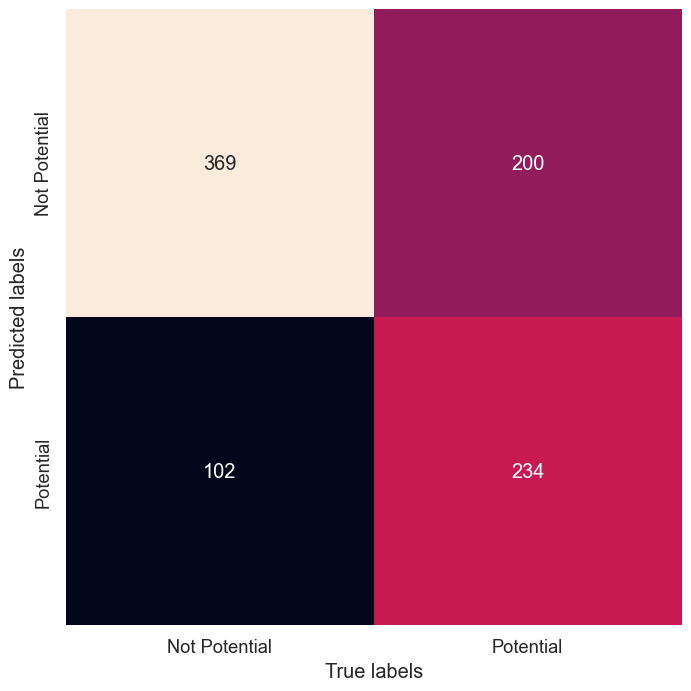

-----------------------------------------------------------------------------------------
**********svcwithout PCA **********
svc without PCA: Accuracy 1.0

svc without PCA confusion matrix: 
[[501   0]
 [  0 404]]

svc without PCA Classification Reports: 
               precision    recall  f1-score   support

Not Potential       1.00      1.00      1.00       501
    Potential       1.00      1.00      1.00       404

     accuracy                           1.00       905
    macro avg       1.00      1.00      1.00       905
 weighted avg       1.00      1.00      1.00       905


svc without PCA confusion matrix: 


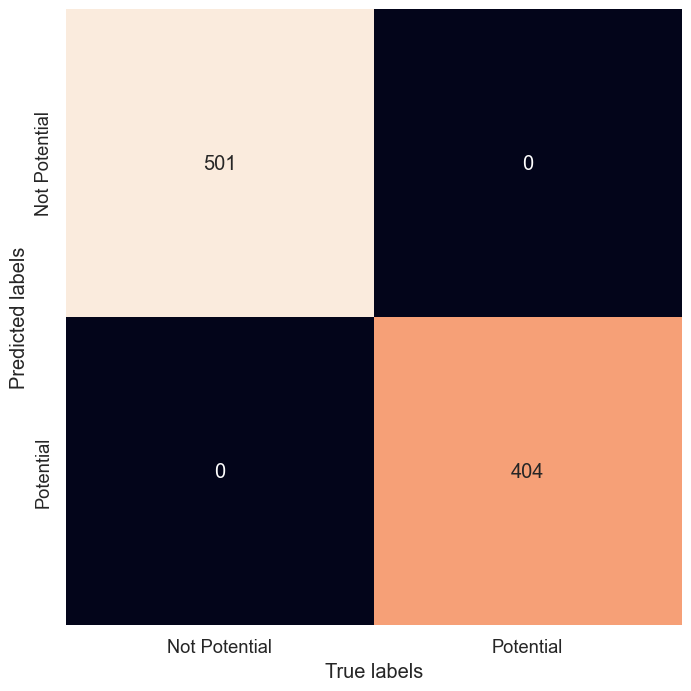

**********lr with PCA **********
lr with PCA: Accuracy 0.5337016574585636

lr with PCA confusion matrix: 
[[375  96]
 [326 108]]

lr with PCA Classification Reports: 
               precision    recall  f1-score   support

Not Potential       0.53      0.80      0.64       471
    Potential       0.53      0.25      0.34       434

     accuracy                           0.53       905
    macro avg       0.53      0.52      0.49       905
 weighted avg       0.53      0.53      0.50       905


lr with PCA confusion matrix: 


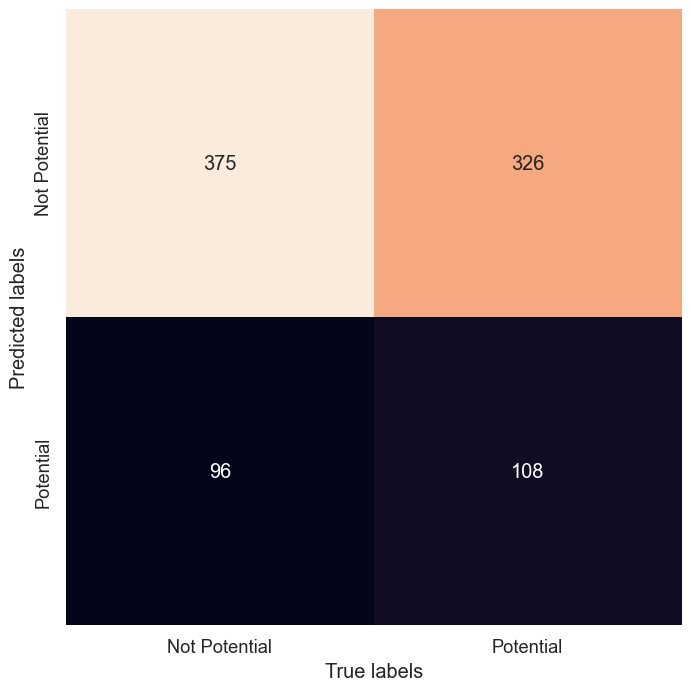

-----------------------------------------------------------------------------------------
**********lrwithout PCA **********
lr without PCA: Accuracy 1.0

lr without PCA confusion matrix: 
[[501   0]
 [  0 404]]

lr without PCA Classification Reports: 
               precision    recall  f1-score   support

Not Potential       1.00      1.00      1.00       501
    Potential       1.00      1.00      1.00       404

     accuracy                           1.00       905
    macro avg       1.00      1.00      1.00       905
 weighted avg       1.00      1.00      1.00       905


lr without PCA confusion matrix: 


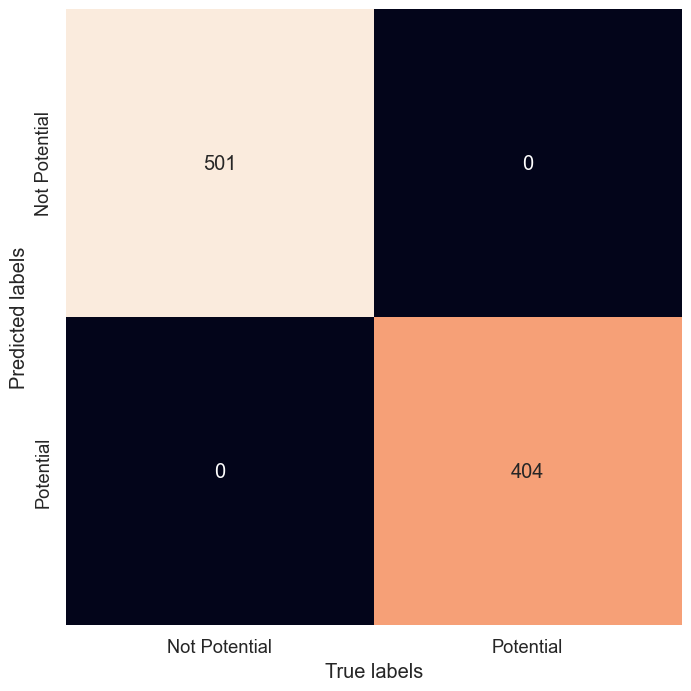

**********knn with PCA **********
knn with PCA: Accuracy 0.5204419889502763

knn with PCA confusion matrix: 
[[265 206]
 [228 206]]

knn with PCA Classification Reports: 
               precision    recall  f1-score   support

Not Potential       0.54      0.56      0.55       471
    Potential       0.50      0.47      0.49       434

     accuracy                           0.52       905
    macro avg       0.52      0.52      0.52       905
 weighted avg       0.52      0.52      0.52       905


knn with PCA confusion matrix: 


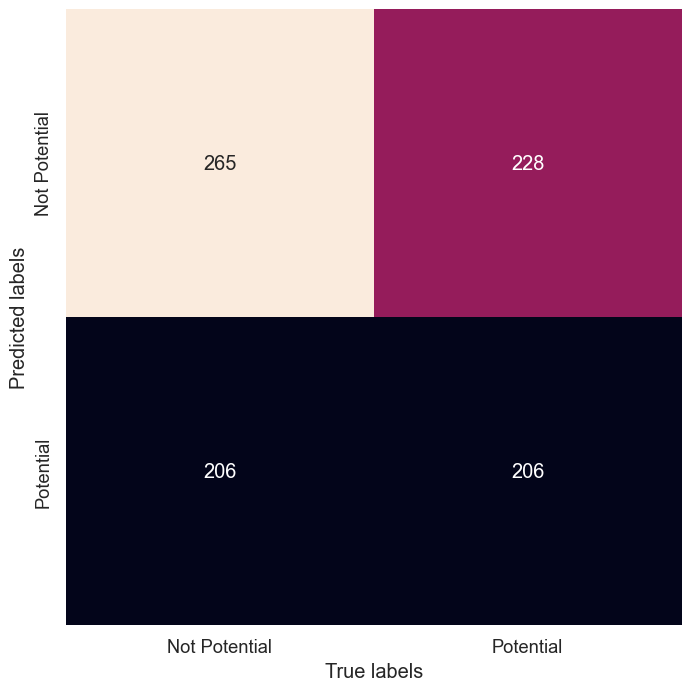

-----------------------------------------------------------------------------------------
**********knnwithout PCA **********
knn without PCA: Accuracy 0.918232044198895

knn without PCA confusion matrix: 
[[470  31]
 [ 43 361]]

knn without PCA Classification Reports: 
               precision    recall  f1-score   support

Not Potential       0.92      0.94      0.93       501
    Potential       0.92      0.89      0.91       404

     accuracy                           0.92       905
    macro avg       0.92      0.92      0.92       905
 weighted avg       0.92      0.92      0.92       905


knn without PCA confusion matrix: 


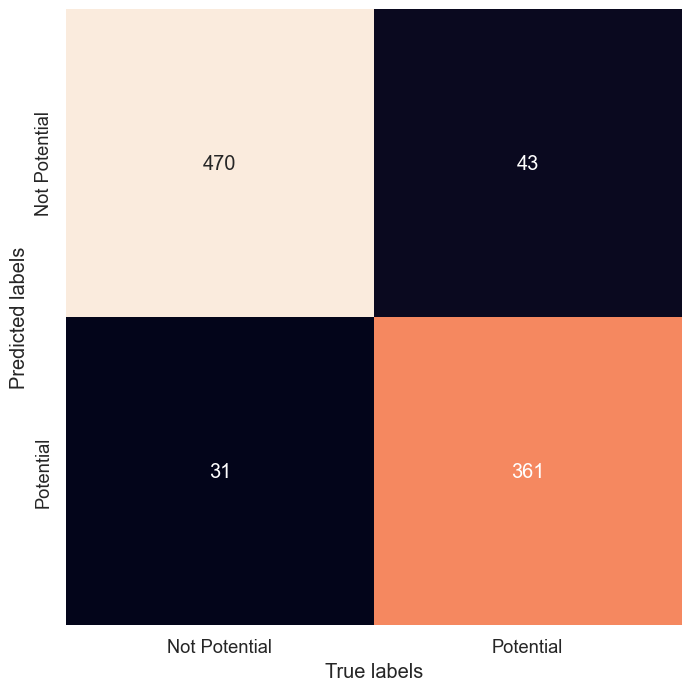

**********nb with PCA **********
nb with PCA: Accuracy 0.6408839779005525

nb with PCA confusion matrix: 
[[335 136]
 [189 245]]

nb with PCA Classification Reports: 
               precision    recall  f1-score   support

Not Potential       0.64      0.71      0.67       471
    Potential       0.64      0.56      0.60       434

     accuracy                           0.64       905
    macro avg       0.64      0.64      0.64       905
 weighted avg       0.64      0.64      0.64       905


nb with PCA confusion matrix: 


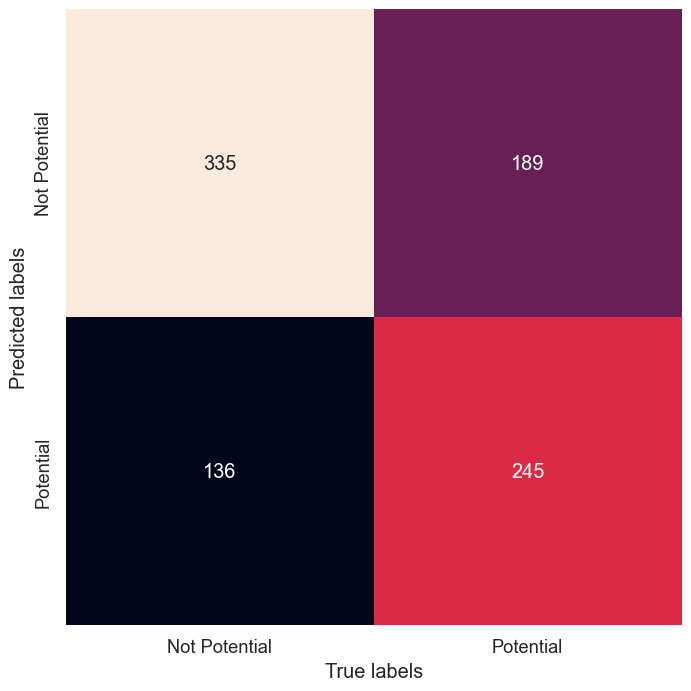

-----------------------------------------------------------------------------------------
**********nbwithout PCA **********
nb without PCA: Accuracy 1.0

nb without PCA confusion matrix: 
[[501   0]
 [  0 404]]

nb without PCA Classification Reports: 
               precision    recall  f1-score   support

Not Potential       1.00      1.00      1.00       501
    Potential       1.00      1.00      1.00       404

     accuracy                           1.00       905
    macro avg       1.00      1.00      1.00       905
 weighted avg       1.00      1.00      1.00       905


nb without PCA confusion matrix: 


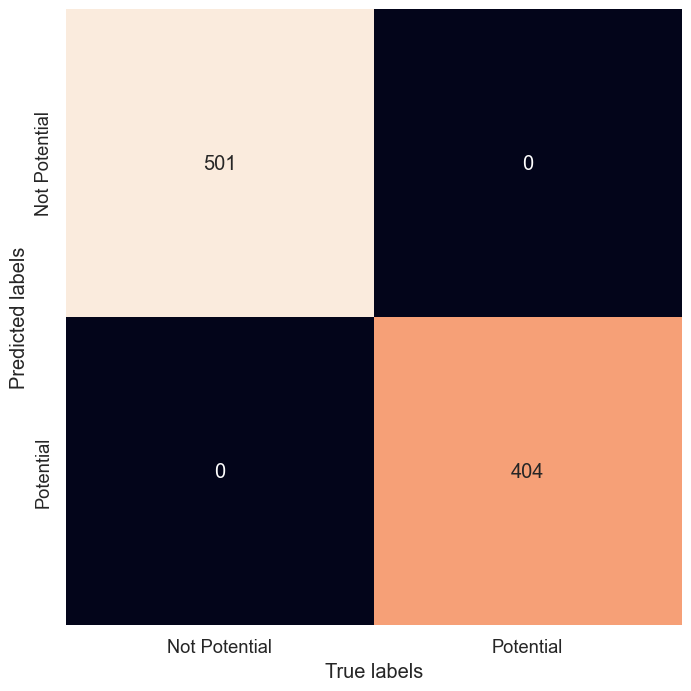

**********dt with PCA **********
dt with PCA: Accuracy 1.0

dt with PCA confusion matrix: 
[[471   0]
 [  0 434]]

dt with PCA Classification Reports: 
               precision    recall  f1-score   support

Not Potential       1.00      1.00      1.00       471
    Potential       1.00      1.00      1.00       434

     accuracy                           1.00       905
    macro avg       1.00      1.00      1.00       905
 weighted avg       1.00      1.00      1.00       905


dt with PCA confusion matrix: 


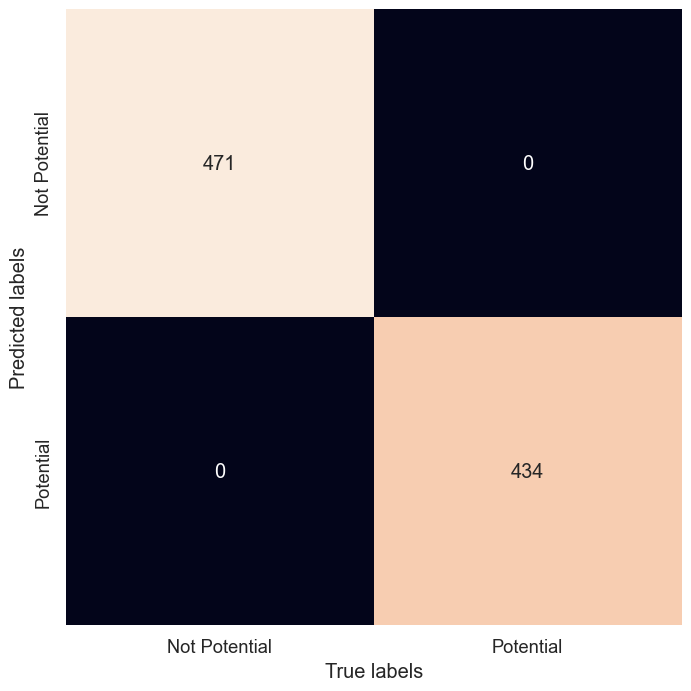

-----------------------------------------------------------------------------------------
**********dtwithout PCA **********
dt without PCA: Accuracy 1.0

dt without PCA confusion matrix: 
[[501   0]
 [  0 404]]

dt without PCA Classification Reports: 
               precision    recall  f1-score   support

Not Potential       1.00      1.00      1.00       501
    Potential       1.00      1.00      1.00       404

     accuracy                           1.00       905
    macro avg       1.00      1.00      1.00       905
 weighted avg       1.00      1.00      1.00       905


dt without PCA confusion matrix: 


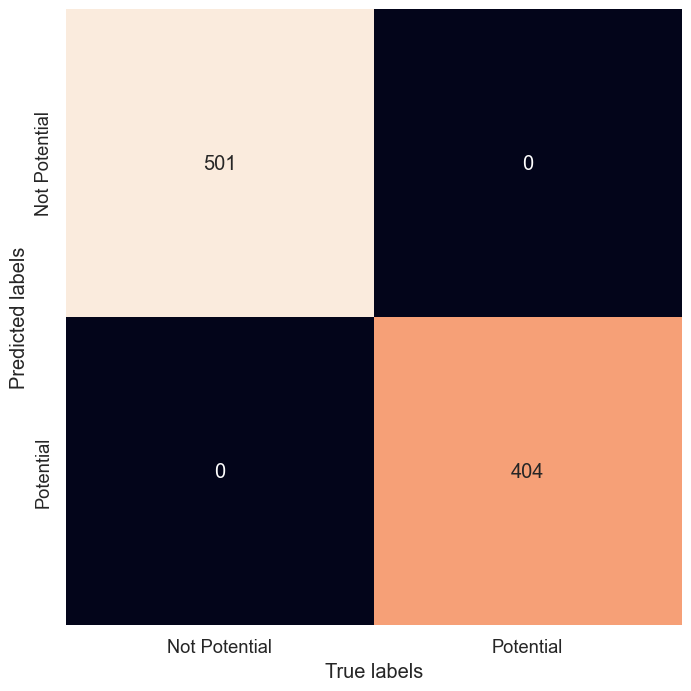

In [382]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

svc = SVC(kernel='linear')
lr = LogisticRegression(solver='saga', multi_class='auto', max_iter=550, fit_intercept=True)
knn = KNeighborsClassifier(n_neighbors=3)
nb = GaussianNB()
dt = DecisionTreeClassifier(max_depth=80)

models = ['svc', 'lr', 'knn', 'nb', 'dt']

for i in range(len(models)):
    print('**********' + models[i] + ' with PCA **********')
    eval(models[i]).fit(X_train_pca, ytrain_scaled)
    y_pred_pca = eval(models[i]).predict(X_test_pca)
    print(models[i] + ' with PCA: Accuracy', eval(models[i]).score(X_test_pca, ytest_scaled))
    print()
    print(models[i] + ' with PCA confusion matrix: ')
    print(confusion_matrix(ytest_scaled, y_pred_pca))
    print()
    print(models[i] + ' with PCA Classification Reports: ')
    print(classification_report(ytest_scaled, y_pred_pca, target_names=['Not Potential', 'Potential']))
    print()
    print(models[i] + ' with PCA confusion matrix: ')
    mat = confusion_matrix(ytest_scaled, y_pred_pca)
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['Not Potential', 'Potential'], yticklabels=['Not Potential', 'Potential'], ax=ax)
    plt.xlabel('True labels')
    plt.ylabel('Predicted labels')
    plt.show()
    del(mat)

    print('-----------------------------------------------------------------------------------------')

    print('**********' + models[i] + 'without PCA **********')
    eval(models[i]).fit(X_train, y_train)
    y_pred = eval(models[i]).predict(X_test)
    print(models[i] + ' without PCA: Accuracy', eval(models[i]).score(X_test, y_test))
    print()
    print(models[i] + ' without PCA confusion matrix: ')
    print(confusion_matrix(y_test, y_pred))
    print()
    print(models[i] + ' without PCA Classification Reports: ')
    print(classification_report(y_test, y_pred, target_names=['Not Potential', 'Potential']))
    print()
    print(models[i] + ' without PCA confusion matrix: ')
    mat = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['Not Potential', 'Potential'], yticklabels=['Not Potential', 'Potential'], ax=ax)
    plt.xlabel('True labels')
    plt.ylabel('Predicted labels')
    plt.show()
    del(mat)


In [391]:
# Define Grid Search parameters
svc_params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.1, 1, 10]}
lr_params = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'C': [0.1, 1, 10]}
knn_params = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
nb_params = {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}
dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, 30, 40, 50]}

# Perform Grid Search and Cross Validation
from sklearn.model_selection import GridSearchCV

svc_cv = GridSearchCV(svc, svc_params, cv=5)
lr_cv = GridSearchCV(lr, lr_params, cv=5)
knn_cv = GridSearchCV(knn, knn_params, cv=5)
nb_cv = GridSearchCV(nb, nb_params, cv=5)
dt_cv = GridSearchCV(dt, dt_params, cv=5)

# Fit the models
svc_cv.fit(X_train, y_train)
lr_cv.fit(X_train, y_train)
knn_cv.fit(X_train, y_train)
nb_cv.fit(X_train, y_train)
dt_cv.fit(X_train, y_train)

# Print the best parameters and scores
print('SVC:', svc_cv.best_params_, svc_cv.best_score_)
print('Logistic Regression:', lr_cv.best_params_, lr_cv.best_score_)
print('K-Nearest Neighbors:', knn_cv.best_params_, knn_cv.best_score_)
print('Naive Bayes:', nb_cv.best_params_, nb_cv.best_score_)
print('Decision Tree:', dt_cv.best_params_, dt_cv.best_score_)


SVC: {'C': 0.1, 'kernel': 'linear'} 1.0
Logistic Regression: {'C': 0.1, 'solver': 'newton-cg'} 1.0
K-Nearest Neighbors: {'n_neighbors': 11, 'weights': 'distance'} 0.9384456993741207
Naive Bayes: {'var_smoothing': 1e-09} 1.0
Decision Tree: {'criterion': 'gini', 'max_depth': 10} 1.0


# 8. Objective 2

**2. Calculate the value and the revenue of your model.** Fit your model on train set. Assume amonge the customers on your test set we only send advertisement to those your model predicted as Class1 and we ignore the rest. From the data you can calculate the average `Cust_Last_Purchase` for those who are in the train set and had the last purchase (`Cust_Last_Purchase`>0) . Assume sending advertisement to each customer costs 5$ and the average purchase you calculated on the train set remains the same for the test set. Calculate the value of your models to choose the best model.

    - cost = advertisement_cost * number of the predicted positive
    - lost = average_purchase * number of the predicted negative but they have been positive
    - gain = average_purchase * number of the predicted positive and they have been positive
    - value = gain - lost - cost
    - revenue = gain - cost

Results for svc
cost : 2215
pos_pred : 443
pos_actual : 434
neg_pred_pos_actual : 155
pos_pred_pos_actual : 288
lost : 2256.4508928571427
gain : 4192.6313364055295
value : -278.81955645161315
revenue : 1977.6313364055295
precision : 0.6501128668171557
recall : 0.663594470046083
f1 : 0.6567844925883695
accuracy : 0.6674033149171271


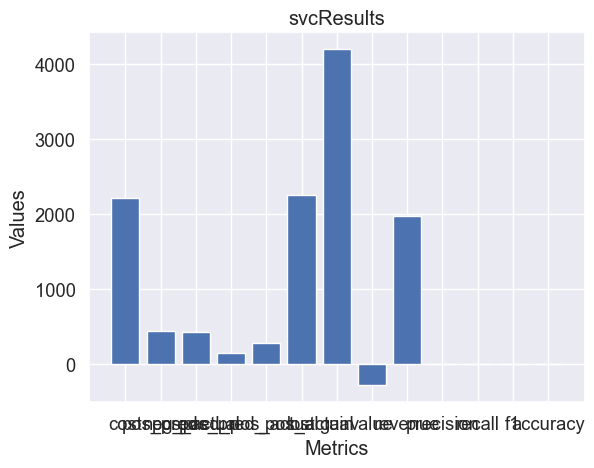

Results for lr
cost : 1020
pos_pred : 204
pos_actual : 434
neg_pred_pos_actual : 96
pos_pred_pos_actual : 108
lost : 1397.5437788018432
gain : 1572.2367511520736
value : -845.3070276497697
revenue : 552.2367511520736
precision : 0.5294117647058824
recall : 0.2488479262672811
f1 : 0.3385579937304075
accuracy : 0.5337016574585636


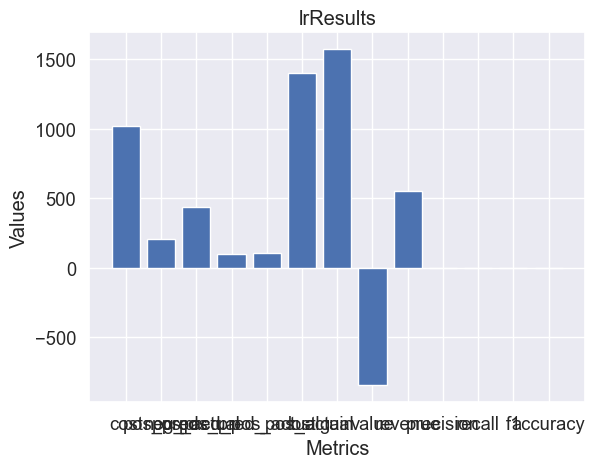

Results for knn
cost : 2060
pos_pred : 412
pos_actual : 434
neg_pred_pos_actual : 206
pos_pred_pos_actual : 206
lost : 2998.896025345622
gain : 2998.896025345622
value : -2060.0
revenue : 938.8960253456221
precision : 0.5
recall : 0.47465437788018433
f1 : 0.48699763593380613
accuracy : 0.5204419889502763


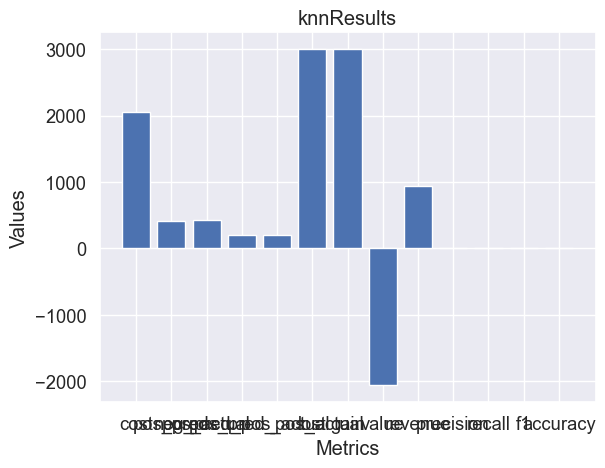

Results for nb
cost : 1920
pos_pred : 384
pos_actual : 434
neg_pred_pos_actual : 134
pos_pred_pos_actual : 250
lost : 1950.7381912442395
gain : 3639.4369239631333
value : -231.30126728110622
revenue : 1719.4369239631333
precision : 0.6510416666666666
recall : 0.576036866359447
f1 : 0.6112469437652811
accuracy : 0.6486187845303868


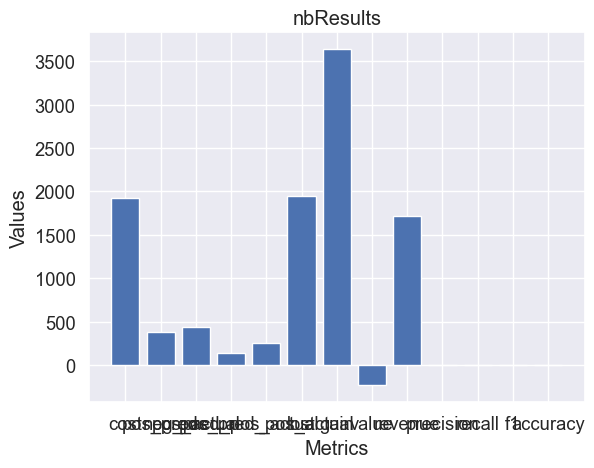

Results for dt
cost : 2170
pos_pred : 434
pos_actual : 434
neg_pred_pos_actual : 0
pos_pred_pos_actual : 434
lost : 0.0
gain : 6318.0625
value : 4148.0625
revenue : 4148.0625
precision : 1.0
recall : 1.0
f1 : 1.0
accuracy : 1.0


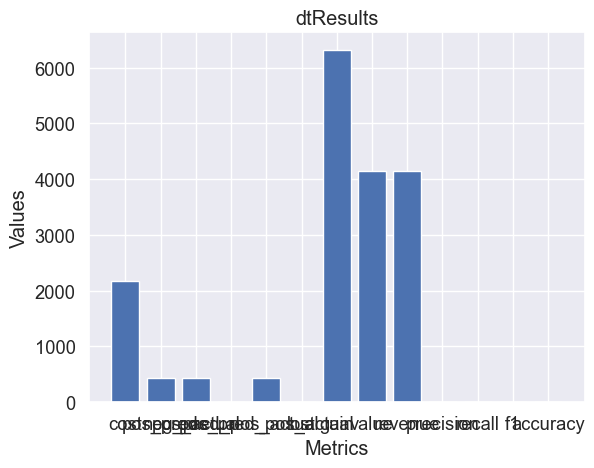

In [411]:
# Define the cost of sending advertisements to each customer
ad_cost = 5

# Get the average `Cust_Last_Purchase` for those who are in the train set and had the last purchase (`Cust_Last_Purchase`>0)
train_last_purchase = data[data['Cust_Last_Purchase'] > 0]['Cust_Last_Purchase'].mean()

# Initialize variables to store the results for each model
model_results = {}

# Fit each model on the train set and calculate the results on the test set
for i in range(len(models)):
    # Fit the model on the train set
    eval(models[i]).fit(Xtrain_scaled, ytrain_scaled)
    
    # Predict the class labels for the test set
    y_pred = eval(models[i]).predict(Xtest_scaled)
    
    # Calculate the cost of sending advertisements to customers predicted as positive
    pos_pred = sum(y_pred == 1)
    cost = ad_cost * pos_pred
    
    # Calculate the number of customers who were actually positive in the test set
    pos_actual = sum(ytest_scaled == 1)
    
    # Calculate the number of customers who were actually negative in the test set but predicted as positive by the model
    neg_pred_pos_actual = sum((y_pred == 1) & (ytest_scaled == 0))
    
    # Calculate the number of customers who were actually positive in the test set and predicted as positive by the model
    pos_pred_pos_actual = sum((y_pred == 1) & (ytest_scaled == 1))
    
    # Calculate the lost and gain from sending advertisements to the predicted positive and negative customers
    lost = train_last_purchase * neg_pred_pos_actual
    gain = train_last_purchase * pos_pred_pos_actual
    
    # Calculate the value and revenue of the model
    value = gain - lost - cost
    revenue = gain - cost

    # Calculate the classification metrics for the model
    precision = precision_score(ytest_scaled, y_pred)
    recall = recall_score(ytest_scaled, y_pred)
    f1 = f1_score(ytest_scaled, y_pred)
    accuracy = accuracy_score(ytest_scaled, y_pred)
    
    # Store the results for this model
    model_results[i] = {'cost': cost, 'pos_pred': pos_pred, 'pos_actual': pos_actual,
                                 'neg_pred_pos_actual': neg_pred_pos_actual, 'pos_pred_pos_actual': pos_pred_pos_actual,
                                 'lost': lost, 'gain': gain, 'value': value, 'revenue': revenue,
                                 'precision': precision, 'recall': recall, 'f1': f1, 'accuracy': accuracy}
    
    print('Results for '+ models[i])

    for key, value in model_results[i].items():
        print(key, ":", value)

    x = ['cost', 'pos_pred', 'pos_actual', 'neg_pred_pos_actual', 'pos_pred_pos_actual', 'lost', 'gain', 'value', 'revenue', 'precision', 'recall', 'f1', 'accuracy']
    y = [model_results[i]['cost'], model_results[i]['pos_pred'], model_results[i]['pos_actual'],
         model_results[i]['neg_pred_pos_actual'], model_results[i]['pos_pred_pos_actual'], model_results[i]['lost'], 
         model_results[i]['gain'], model_results[i]['value'], model_results[i]['revenue'],
         model_results[i]['precision'], model_results[i]['recall'], model_results[i]['f1'], model_results[i]['accuracy']]
 
    plt.bar(x, y)
    plt.title(models[i] + 'Results')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.show()


Results for svc
cost : 2215
pos_pred : 443
pos_actual : 434
neg_pred_pos_actual : 155
pos_pred_pos_actual : 288
lost : 2256.4508928571427
gain : 4192.6313364055295
value : -278.81955645161315
revenue : 1977.6313364055295


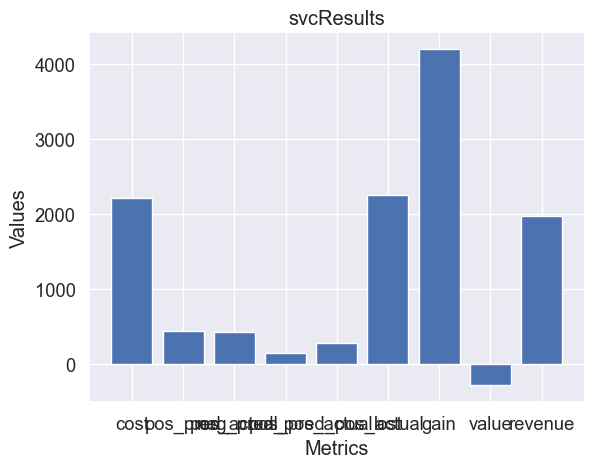

Results for lr
cost : 1020
pos_pred : 204
pos_actual : 434
neg_pred_pos_actual : 96
pos_pred_pos_actual : 108
lost : 1397.5437788018432
gain : 1572.2367511520736
value : -845.3070276497697
revenue : 552.2367511520736


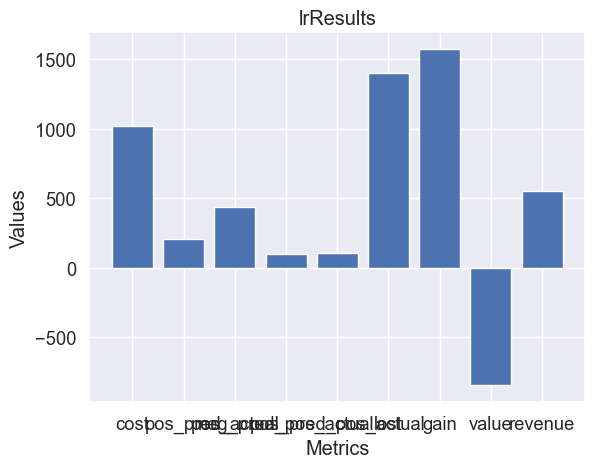

Results for knn
cost : 2060
pos_pred : 412
pos_actual : 434
neg_pred_pos_actual : 206
pos_pred_pos_actual : 206
lost : 2998.896025345622
gain : 2998.896025345622
value : -2060.0
revenue : 938.8960253456221


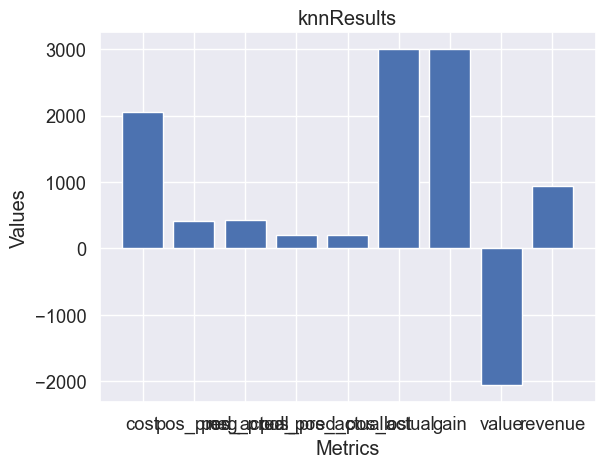

Results for nb
cost : 1920
pos_pred : 384
pos_actual : 434
neg_pred_pos_actual : 134
pos_pred_pos_actual : 250
lost : 1950.7381912442395
gain : 3639.4369239631333
value : -231.30126728110622
revenue : 1719.4369239631333


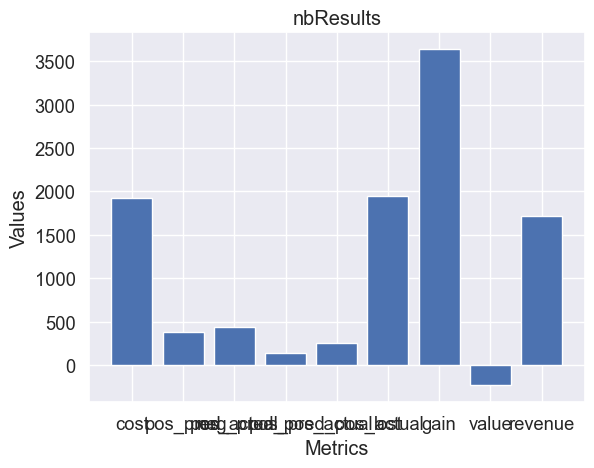

Results for dt
cost : 2170
pos_pred : 434
pos_actual : 434
neg_pred_pos_actual : 0
pos_pred_pos_actual : 434
lost : 0.0
gain : 6318.0625
value : 4148.0625
revenue : 4148.0625


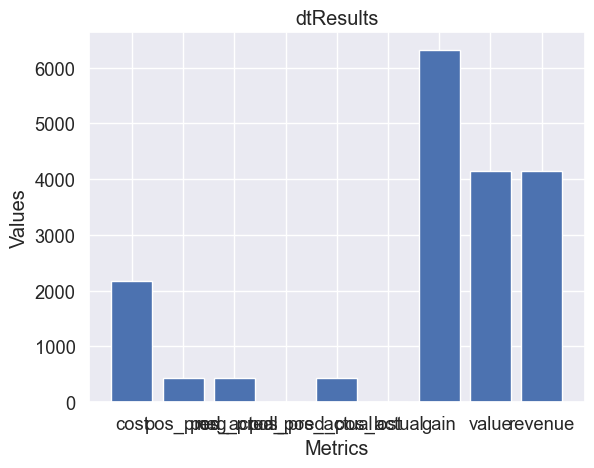

In [381]:
# Define the cost of sending advertisements to each customer
ad_cost = 5

# Get the average `Cust_Last_Purchase` for those who are in the train set and had the last purchase (`Cust_Last_Purchase`>0)
train_last_purchase = data[data['Cust_Last_Purchase'] > 0]['Cust_Last_Purchase'].mean()

# Initialize variables to store the results for each model
model_results = {}

# Fit each model on the train set and calculate the results on the test set
for i in range(len(models)):
    # Fit the model on the train set
    eval(models[i]).fit(Xtrain_scaled, ytrain_scaled)
    
    # Predict the class labels for the test set
    y_pred = eval(models[i]).predict(Xtest_scaled)
    
    # Calculate the cost of sending advertisements to customers predicted as positive
    pos_pred = sum(y_pred == 1)
    cost = ad_cost * pos_pred
    
    # Calculate the number of customers who were actually positive in the test set
    pos_actual = sum(ytest_scaled == 1)
    
    # Calculate the number of customers who were actually negative in the test set but predicted as positive by the model
    neg_pred_pos_actual = sum((y_pred == 1) & (ytest_scaled == 0))
    
    # Calculate the number of customers who were actually positive in the test set and predicted as positive by the model
    pos_pred_pos_actual = sum((y_pred == 1) & (ytest_scaled == 1))
    
    # Calculate the lost and gain from sending advertisements to the predicted positive and negative customers
    lost = train_last_purchase * neg_pred_pos_actual
    gain = train_last_purchase * pos_pred_pos_actual
    
    # Calculate the value and revenue of the model
    value = gain - lost - cost
    revenue = gain - cost
    
    # Store the results for this model
    model_results[i] = {'cost': cost, 'pos_pred': pos_pred, 'pos_actual': pos_actual,
                                 'neg_pred_pos_actual': neg_pred_pos_actual, 'pos_pred_pos_actual': pos_pred_pos_actual,
                                 'lost': lost, 'gain': gain, 'value': value, 'revenue': revenue}
    
    print('Results for '+ models[i])

    for key, value in model_results[i].items():
        print(key, ":", value)

    x = ['cost', 'pos_pred', 'pos_actual', 'neg_pred_pos_actual', 'pos_pred_pos_actual', 'lost', 'gain', 'value', 'revenue']
    y = [model_results[i]['cost'], model_results[i]['pos_pred'], model_results[i]['pos_actual'],
         model_results[i]['neg_pred_pos_actual'], model_results[i]['pos_pred_pos_actual'], model_results[i]['lost'], 
         model_results[i]['gain'], model_results[i]['value'], model_results[i]['revenue']]
 
    plt.bar(x, y)
    plt.title(models[i] + 'Results')
    plt.xlabel('Metrics', rotation=90)
    plt.ylabel('Values')
    plt.show()


In [389]:
# Define the cost of sending advertisements to each customer
ad_cost = 5

# Get the average `Cust_Last_Purchase` for those who are in the train set and had the last purchase (`Cust_Last_Purchase`>0)
train_last_purchase = data[data['Cust_Last_Purchase'] > 0]['Cust_Last_Purchase'].mean()

# Initialize variables to store the results for each model
model_results = {}

# Fit each model on the train set and calculate the results on the test set
for i in range(len(models)):
    # Fit the model on the train set
    eval(models[i]).fit(Xtrain_scaled, ytrain_scaled)
    
    # Predict the class labels for the test set
    y_pred = eval(models[i]).predict(Xtest_scaled)
    
    # Calculate the cost of sending advertisements to customers predicted as positive
    pos_pred = sum(y_pred == 1)
    cost = ad_cost * pos_pred
    
    # Calculate the number of customers who were actually positive in the test set
    pos_actual = sum(ytest_scaled == 1)
    
    # Calculate the number of customers who were actually negative in the test set but predicted as positive by the model
    neg_pred_pos_actual = sum((y_pred == 1) & (ytest_scaled == 0))
    
    # Calculate the number of customers who were actually positive in the test set and predicted as positive by the model
    pos_pred_pos_actual = sum((y_pred == 1) & (ytest_scaled == 1))
    
    # Calculate the lost and gain from sending advertisements to the predicted positive and negative customers
    lost = train_last_purchase * neg_pred_pos_actual
    gain = train_last_purchase * pos_pred_pos_actual
    
    # Calculate the value and revenue of the model
    value = gain - lost - cost
    revenue = gain - cost
    
    # Store the results for this model
    model_results[i] = {'cost': cost, 'pos_pred': pos_pred, 'pos_actual': pos_actual,
                                 'neg_pred_pos_actual': neg_pred_pos_actual, 'pos_pred_pos_actual': pos_pred_pos_actual,
                                 'lost': lost, 'gain': gain, 'value': value, 'revenue': revenue}
    
    print('Results for '+ models[i])

    for key, value in model_results[i].items():
        print(key, ":", value)

# Select the model with the highest value
best_model_idx = max(model_results, key=lambda x: model_results[x]['value'])

# Print the results for the best model
print('Results for the best model:', models[best_model_idx])
for key, value in model_results[best_model_idx].items():
    print(key, ":", value)

# Plot the results for the best model
x = ['cost', 'pos_pred', 'pos_actual', 'neg_pred_pos_actual', 'pos_pred_pos_actual', 'lost', 'gain', 'value', 'revenue']
y = [model_results[best_model_idx]['cost'], model_results[best_model_idx]['pos_pred'], model_results[best_model_idx]['pos_actual'],
     model_results[best_model_idx]['neg_pred_pos_actual'], model_results[best_model_idx]['pos_pred_pos_actual'], model_results[best_model_idx]['lost']]


Results for svc
cost : 2215
pos_pred : 443
pos_actual : 434
neg_pred_pos_actual : 155
pos_pred_pos_actual : 288
lost : 2256.4508928571427
gain : 4192.6313364055295
value : -278.81955645161315
revenue : 1977.6313364055295
Results for lr
cost : 1020
pos_pred : 204
pos_actual : 434
neg_pred_pos_actual : 96
pos_pred_pos_actual : 108
lost : 1397.5437788018432
gain : 1572.2367511520736
value : -845.3070276497697
revenue : 552.2367511520736
Results for knn
cost : 2060
pos_pred : 412
pos_actual : 434
neg_pred_pos_actual : 206
pos_pred_pos_actual : 206
lost : 2998.896025345622
gain : 2998.896025345622
value : -2060.0
revenue : 938.8960253456221
Results for nb
cost : 1920
pos_pred : 384
pos_actual : 434
neg_pred_pos_actual : 134
pos_pred_pos_actual : 250
lost : 1950.7381912442395
gain : 3639.4369239631333
value : -231.30126728110622
revenue : 1719.4369239631333
Results for dt
cost : 2170
pos_pred : 434
pos_actual : 434
neg_pred_pos_actual : 0
pos_pred_pos_actual : 434
lost : 0.0
gain : 6318.0625

# 9. Objective 3
    
**3. Compare your best models' revenue with the revenue of the default solution which is sending advertisement to all the customers in X_test.** Which solution would you choose?

    - cost = advertisement_cost * size of the test set
    - gain = sum(Cust_Last_Purchase) on test set
    - revenue = gain - cost



In [256]:
data.head()

Potential_Customer      C_ID  Cust_Last_Purchase  Pur_3_years  Pur_5_years  \
0                 1.0    9946.0                 5.0          2.0         17.0   
1                 1.0   87939.0                30.0          1.0          7.0   
2                 0.0   88003.0                 0.0          5.0         12.0   
3                 1.0  188721.0                20.0          1.0         11.0   
4                 1.0   88056.0                 5.0          3.0         15.0   

   Pur_3_years_Indirect  Pur_5_years_Indirect  Pur_latest  Pur_3_years_Avg  \
0                   2.0                   4.0         0.0             7.50   
1                   0.0                   3.0        25.0            25.00   
2                   3.0                   5.0        15.0            15.00   
3                   0.0                   3.0        20.0            20.00   
4                   2.0                   7.0         3.0             4.33   

   Pur_5_years_Avg  ...  Ad_Res_Ind_1_Year  Ad_Res_Ind_3_Year  \
0             7.76  ...                3.0               12.0   
1            13.00  ...                6.0                6.0   
2            11.25  ...                6.0               17.0   
3            12.45  ...                8.0                8.0   
4             3.80  ...                6.0               12.0   

   Ad_Res_Ind_5_Year  Status_Cust  Status_Latest_Ad   Age  Gender  Cust_Prop  \
0               16.0            A               0.0  71.0       F          H   
1               22.0            A               1.0   7.0       M          U   
2               22.0            S               1.0  79.0       F          U   
3               33.0            A               0.0  73.0       F          U   
4               24.0            S               1.0  68.0       F          H   

   Cust_Ann_Income Status_Cust_New  
0          65957.0               A  
1              0.0               A  
2              0.0               S  
3          76293.0               A  
4         113663.0               S  

[5 rows x 26 columns]

In [406]:
# Calculate the cost of the default solution
default_cost = 5 * len(Xtest_scaled)

# Calculate the gain of the default solution
default_gain = sum(data['Cust_Last_Purchase'])

# Calculate the revenue of the default solution
default_revenue = default_gain - default_cost

# Print the revenue of the default solution
print('Default revenue: $', default_revenue)

# Compare the revenue of the best models with the revenue of the default solution
for model_name in model_results:
    model_revenue = model_results[model_name]['revenue']
    print(model_name, 'revenue: $', model_revenue)


Default revenue: $ 20747.25
0 revenue: $ 1977.6313364055295
1 revenue: $ 552.2367511520736
2 revenue: $ 938.8960253456221
3 revenue: $ 1719.4369239631333
4 revenue: $ 4148.0625


In [ ]:
best_value = -float('inf')
best_model = None

for i in range(len(models)):
    if model_results[i]['value'] > best_value:
        best_value = model_results[i]['value']
        best_model = models[i]

print('Best model based on value:', best_model)
print('Value of the best model:', best_value)
print('Revenue of the default solution:', default_revenue)

if best_value > default_revenue:
    print('Choose the best model')
else:
    print('Choose the default solution')


Best model based on value: dt
Value of the best model: 4148.0625
Revenue of the default solution: 4148.0625
Choose the default solution


# 10. Objective 4
    
**4. Assume the next time you want to target a group of 30,000 customers simillar to this group. And assume the purchase rate is $10%$ which means 10 out of 100 people who receive the advertisement will purchase the product. Also assume your model will have the same Precision and Recall for Class1 .** Will you send the advertisement to everyone, or you use one of the models you have already created?

    - calculate your model's revenue on this set of 30,000 customers based on the above assumptions
    - calculate the revenue of the default model: send advertisement to everyone
         - cost = advertisement_cost * size of the test set
         - gain = average_purchase * purchase_rate
         - revenue = gain - cost
    
**Hint:**
    To calculate the revenue of a model for this new set of customers with different purchase rate we need to calculate the new confusion matrix given Precision and Recall for Class1 are fixed.

In [412]:
purchase_rate = 0.1
num_customers = 30000
num_purchases = int(purchase_rate * num_customers)

In [413]:
for model_name in model_results:
    # Calculate confusion matrix for the new set of customers
    tp = int(num_purchases * model_results[model_name]['precision'])
    fn = num_purchases - tp
    tn = int((num_customers - num_purchases) * (1 - model_results[model_name]['recall']))
    fp = (num_customers - num_purchases) - tn

    # Calculate cost and gain
    advertisement_cost = 0.2  # assume advertisement cost is $0.20 per customer
    cost = advertisement_cost * num_customers
    average_purchase = 50  # assume average purchase value is $50
    gain = average_purchase * num_purchases

    # Calculate revenue
    revenue = gain - cost

    # Calculate cost and gain for default model
    purchase_rate = 0.1
    cost = advertisement_cost * num_customers
    gain = average_purchase * (num_customers * purchase_rate)

    # Calculate revenue for default model
    default_revenue = gain - cost

    if revenue > default_revenue:
        print("Use the model to target customers")
    else:
        print("Send advertisement to everyone")


Send advertisement to everyone
Send advertisement to everyone
Send advertisement to everyone
Send advertisement to everyone
Send advertisement to everyone


In [414]:
average_purchase = data[data['Cust_Last_Purchase'] > 0]['Cust_Last_Purchase'].mean()

model_revenues = {}
for i in model_results:
    # Calculate the new confusion matrix
    true_positives = 0.1 * 30000 * model_results[i]['precision']
    if model_results[i]['neg_pred_pos_actual'] != 0:
        false_positives = (1 - model_results[i]['recall']) * model_results[i]['neg_pred_pos_actual'] * (30000 - true_positives) / model_results[i]['neg_pred_pos_actual']
    else:
        false_positives = 0
    confusion_matrix = [[true_positives, false_positives], [0, 0]]

    # Calculate the revenue for each model and the default solution
    default_cost = 5 * 30000
    default_gain = average_purchase * 0.1 * 30000
    default_revenue = default_gain - default_cost

    tp = model_results[i]['pos_pred_pos_actual']
    fp = model_results[i]['pos_pred'] - tp
    fn = model_results[i]['pos_actual'] - tp
    tn = model_results[i]['neg_pred_pos_actual'] - fp
    model_confusion_matrix = [[tp, fp], [fn, tn]]
    model_precision = tp / (tp + fp)
    model_recall = tp / (tp + fn)
    model_true_positives = true_positives * model_precision
    if tn != 0:
        model_false_positives = (1 - model_recall) * tn * (30000 - model_true_positives) / tn
    else:
        model_false_positives = 0
    model_confusion_matrix[0][0] = model_true_positives
    model_confusion_matrix[0][1] = model_false_positives
    model_gain = model_true_positives * average_purchase
    model_cost = 5 * (model_true_positives + model_false_positives)
    model_revenue = model_gain - model_cost
    model_revenues[i] = model_revenue
    
    print(models[i], 'revenue: $', model_revenue)
    
print('Default solution revenue: $', default_revenue)


svc revenue: $ 12118.652704749464
lr revenue: $ 8036.44529443656
knn revenue: $ 7168.310771889401
nb revenue: $ 12153.304666967435
dt revenue: $ 28673.243087557603
Default solution revenue: $ -106326.75691244239
